# HOUSING: PRICE PREDICTION

In [100]:
!pip install lightgbm
!pip install xgboost
!pip3 install plotly
import pandas as pd
!pip install -U klib
import klib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder,power_transform,StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
!pip install scikit-plot
import scikitplot as skplt
import plotly.express as px
from numpy import mean
import matplotlib.gridspec as gridspec
from matplotlib.gridspec import GridSpec

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

In [4]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [5]:
data.shape

(1168, 81)

In [6]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Our agenda in this project
1. We will be predicting the price of the house and use regression analysis to build the model.

2. First, use the train dataset and do the EDA process, fitting the best model and saving the model.

3. Then, use the test dataset , load the saved model and predict the values over the test data.

In [7]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000    954.00000    1168.000000  1168.000000   
mean    724.136130    56.767979     70.98847   10484.749144     6.104452   
std     416.159877    41.940650     24.82875    8957.442311     1.390153   
min       1.000000    20.000000     21.00000    1300.000000     1.000000   
25%     360.500000    20.000000     60.00000    7621.500000     5.000000   
50%     714.500000    50.000000     70.00000    9522.500000     6.000000   
75%    1079.500000    70.000000     80.00000   11515.500000     7.000000   
max    1460.000000   190.000000    313.00000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1168.000000  1168.000000   1168.000000  1161.000000  1168.000000  ...   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027  ...   
std       1.124343    30.145255     20.785185   182.595606   462.664785  ...   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000  ...   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000  ...   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

We can see that there are float, int and object data type and we need to handle the categorical data in further analysis.

In [10]:
data.isna().sum().sort_values(ascending=False).head(20)

PoolQC          1161
MiscFeature     1124
Alley           1091
Fence            931
FireplaceQu      551
LotFrontage      214
GarageYrBlt       64
GarageFinish      64
GarageType        64
GarageQual        64
GarageCond        64
BsmtExposure      31
BsmtFinType2      31
BsmtQual          30
BsmtCond          30
BsmtFinType1      30
MasVnrType         7
MasVnrArea         7
Id                 0
Functional         0
dtype: int64

From this we can see the columns name which have many missing values like PoolQC,MiscFeature,Alley,Fence.

In [11]:
data1=data.select_dtypes(include='object').head()

In [12]:
{column:len(data[column].unique())for column in data.select_dtypes(include='object')}

{'MSZoning': 5,
 'Street': 2,
 'Alley': 3,
 'LotShape': 4,
 'LandContour': 4,
 'Utilities': 1,
 'LotConfig': 5,
 'LandSlope': 3,
 'Neighborhood': 25,
 'Condition1': 9,
 'Condition2': 8,
 'BldgType': 5,
 'HouseStyle': 8,
 'RoofStyle': 6,
 'RoofMatl': 8,
 'Exterior1st': 14,
 'Exterior2nd': 15,
 'MasVnrType': 5,
 'ExterQual': 4,
 'ExterCond': 5,
 'Foundation': 6,
 'BsmtQual': 5,
 'BsmtCond': 5,
 'BsmtExposure': 5,
 'BsmtFinType1': 7,
 'BsmtFinType2': 7,
 'Heating': 6,
 'HeatingQC': 5,
 'CentralAir': 2,
 'Electrical': 5,
 'KitchenQual': 4,
 'Functional': 7,
 'FireplaceQu': 6,
 'GarageType': 7,
 'GarageFinish': 4,
 'GarageQual': 6,
 'GarageCond': 6,
 'PavedDrive': 3,
 'PoolQC': 4,
 'Fence': 5,
 'MiscFeature': 5,
 'SaleType': 9,
 'SaleCondition': 6}

It shows how many unique values are there present in each column.

GridSpec(6, 6)

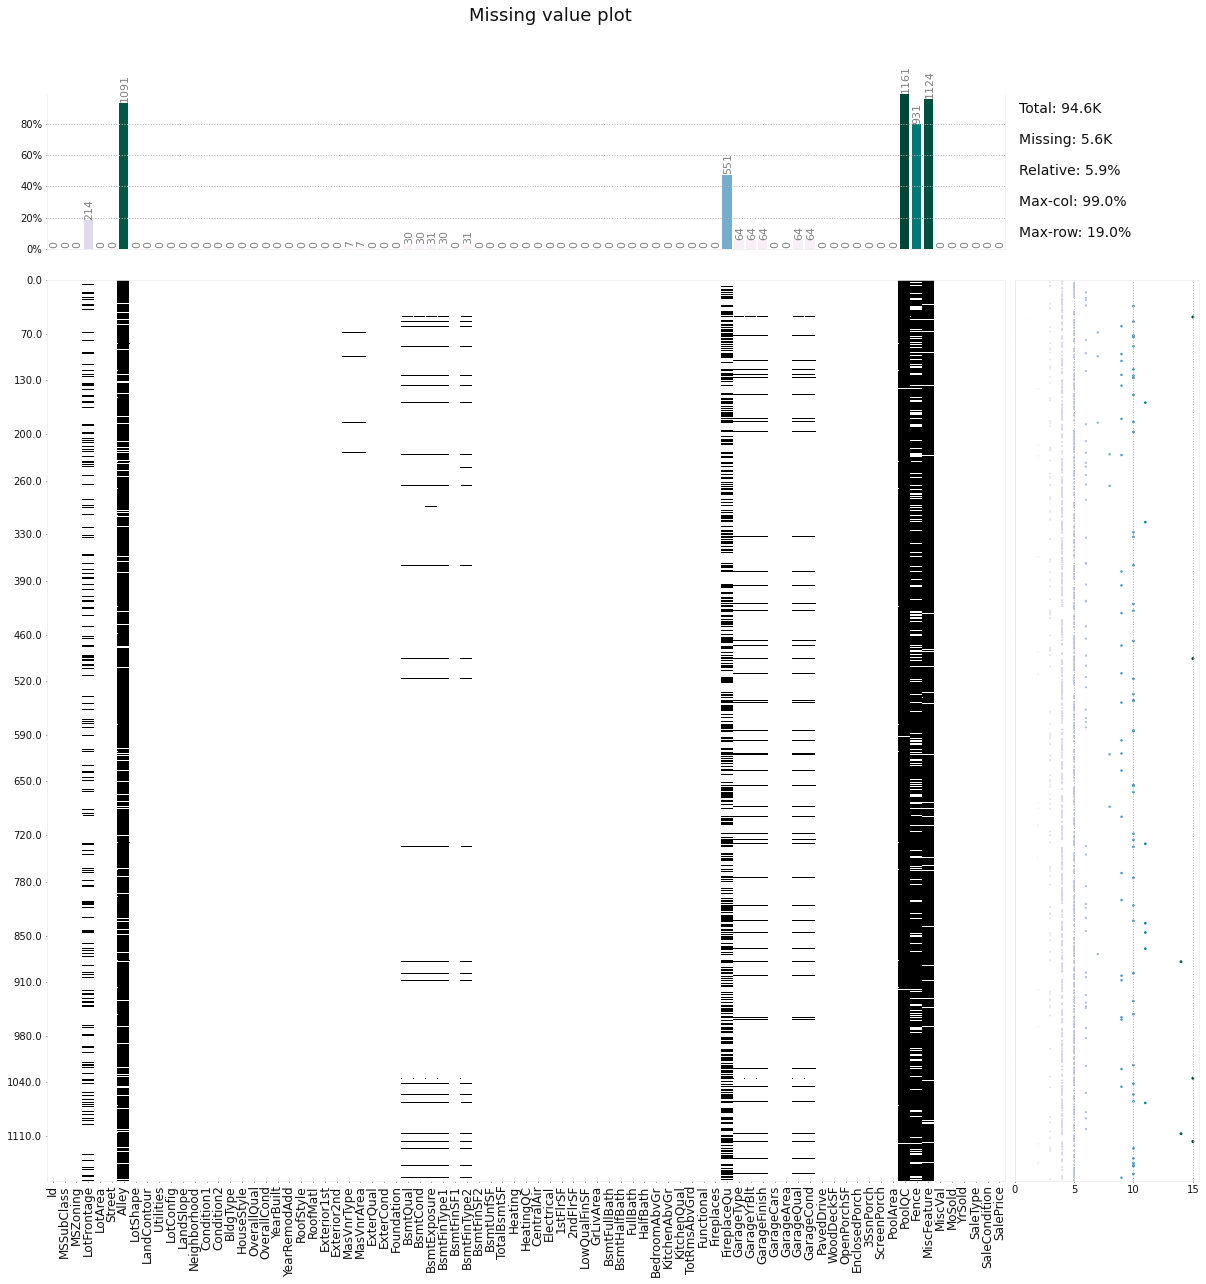

In [13]:
klib.missingval_plot(data)

There are some columns which have more then 80% missing values.

### Checking the value counts of categorical data

In [16]:
for column in data.columns:
    if data[column].dtypes == object:
        print(str(column) + ' : ' + str(data[column].unique()))
        print(data[column].value_counts())
        print('\n')

MSZoning : ['RL' 'RM' 'FV' 'RH' 'C (all)']
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


Street : ['Pave' 'Grvl']
Pave    1164
Grvl       4
Name: Street, dtype: int64


Alley : [nan 'Grvl' 'Pave']
Grvl    41
Pave    36
Name: Alley, dtype: int64


LotShape : ['IR1' 'Reg' 'IR2' 'IR3']
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64


LandContour : ['Lvl' 'Bnk' 'HLS' 'Low']
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64


Utilities : ['AllPub']
AllPub    1168
Name: Utilities, dtype: int64


LotConfig : ['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64


LandSlope : ['Gtl' 'Mod' 'Sev']
Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64


Neighborhood : ['NPkVill' 'NAmes' 'NoRidge' 'NWAmes' 'Gilbert' 'Sawyer' 'Edwards'
 'IDOTRR' 'CollgCr' 'Mitchel' 'Crawfor' 'BrDal

In categorical columns there are missing values present in columns Alley, MasVnrType, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature.

## Checking the percentage of missing data

In [17]:
def missing_values_table(data):
    mis_val = data.isnull().sum()
    mis_val_percent = 100 * data.isnull().sum() / len(data)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns
missing_values_table(data)

Your selected dataframe has 81 columns.
There are 18 columns that have missing values.


Missing Values  % of Total Values
PoolQC                  1161               99.4
MiscFeature             1124               96.2
Alley                   1091               93.4
Fence                    931               79.7
FireplaceQu              551               47.2
LotFrontage              214               18.3
GarageType                64                5.5
GarageYrBlt               64                5.5
GarageFinish              64                5.5
GarageQual                64                5.5
GarageCond                64                5.5
BsmtExposure              31                2.7
BsmtFinType2              31                2.7
BsmtCond                  30                2.6
BsmtFinType1              30                2.6
BsmtQual                  30                2.6
MasVnrArea                 7                0.6
MasVnrType                 7                0.6

# Handling missing data

In [18]:
basement=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
#NA means No_Basement for all i in basement. Let's replace NAs with 'No_Basement'
for i in basement:
    data[i].fillna('No_Basement',inplace=True)
    print(data[i].value_counts())
    
#As per given definition, NA means None. Let's replace NAs with 'None'
data['MiscFeature'].fillna('None',inplace=True)
print(data['MiscFeature'].value_counts())

#As per given definition, NA means No_alley_access. Let's replace missing data with 'No_alley_access'
data['Alley'].fillna('No_alley_access',inplace=True)
print(data['Alley'].value_counts())

#As per given definition, NA means No_Fence. Let's replace missing data with 'No_Fence'
data['Fence'].fillna('No_Fence',inplace=True)
print(data['Fence'].value_counts())

#NA means No_Fireplace. Let's replace missing data with 'No_Fireplace'
data['FireplaceQu'].fillna('No_Fireplace',inplace=True)
print(data['FireplaceQu'].value_counts())

#Let's Impute the missing values and replace it with the median
data['LotFrontage'].fillna(data['LotFrontage'].median(),inplace=True)

garage=['GarageType','GarageFinish','GarageQual','GarageCond']
#NA means No_Garage for all i in garage
for i in garage:
    data[i].fillna('No_Garage',inplace=True)
    print(data[i].value_counts())
    
#As per dataframe "df" we can say that most of the rows of GarageYrBlt has same value as YearBuilt so we replace with that
data["GarageYrBlt"]=data["GarageYrBlt"].fillna(data["YearBuilt"])
print(data['GarageYrBlt'].value_counts())    
    
#As per given values of MasVnrArea,  Let's replace missing data with 0's
data['MasVnrArea'].fillna(0,inplace=True)
print(data['MasVnrArea'].value_counts())

#Let's fill the missing values in MasVnrType with None
data['MasVnrType'] = data['MasVnrType'].fillna('None')

TA             517
Gd             498
Ex              94
No_Basement     30
Fa              29
Name: BsmtQual, dtype: int64
TA             1041
Gd               56
Fa               39
No_Basement      30
Po                2
Name: BsmtCond, dtype: int64
No             756
Av             180
Gd             108
Mn              93
No_Basement     31
Name: BsmtExposure, dtype: int64
Unf            345
GLQ            330
ALQ            174
BLQ            121
Rec            109
LwQ             59
No_Basement     30
Name: BsmtFinType1, dtype: int64
Unf            1002
Rec              43
LwQ              40
No_Basement      31
BLQ              24
ALQ              16
GLQ              12
Name: BsmtFinType2, dtype: int64
None    1124
Shed      40
Gar2       2
TenC       1
Othr       1
Name: MiscFeature, dtype: int64
No_alley_access    1091
Grvl                 41
Pave                 36
Name: Alley, dtype: int64
No_Fence    931
MnPrv       129
GdPrv        51
GdWo         47
MnWw         10
Name:

# Exploratory Data Analysis

## Univariate Analysis

In [14]:
col=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition','MSSubClass','OverallQual','OverallCond','GarageCars']

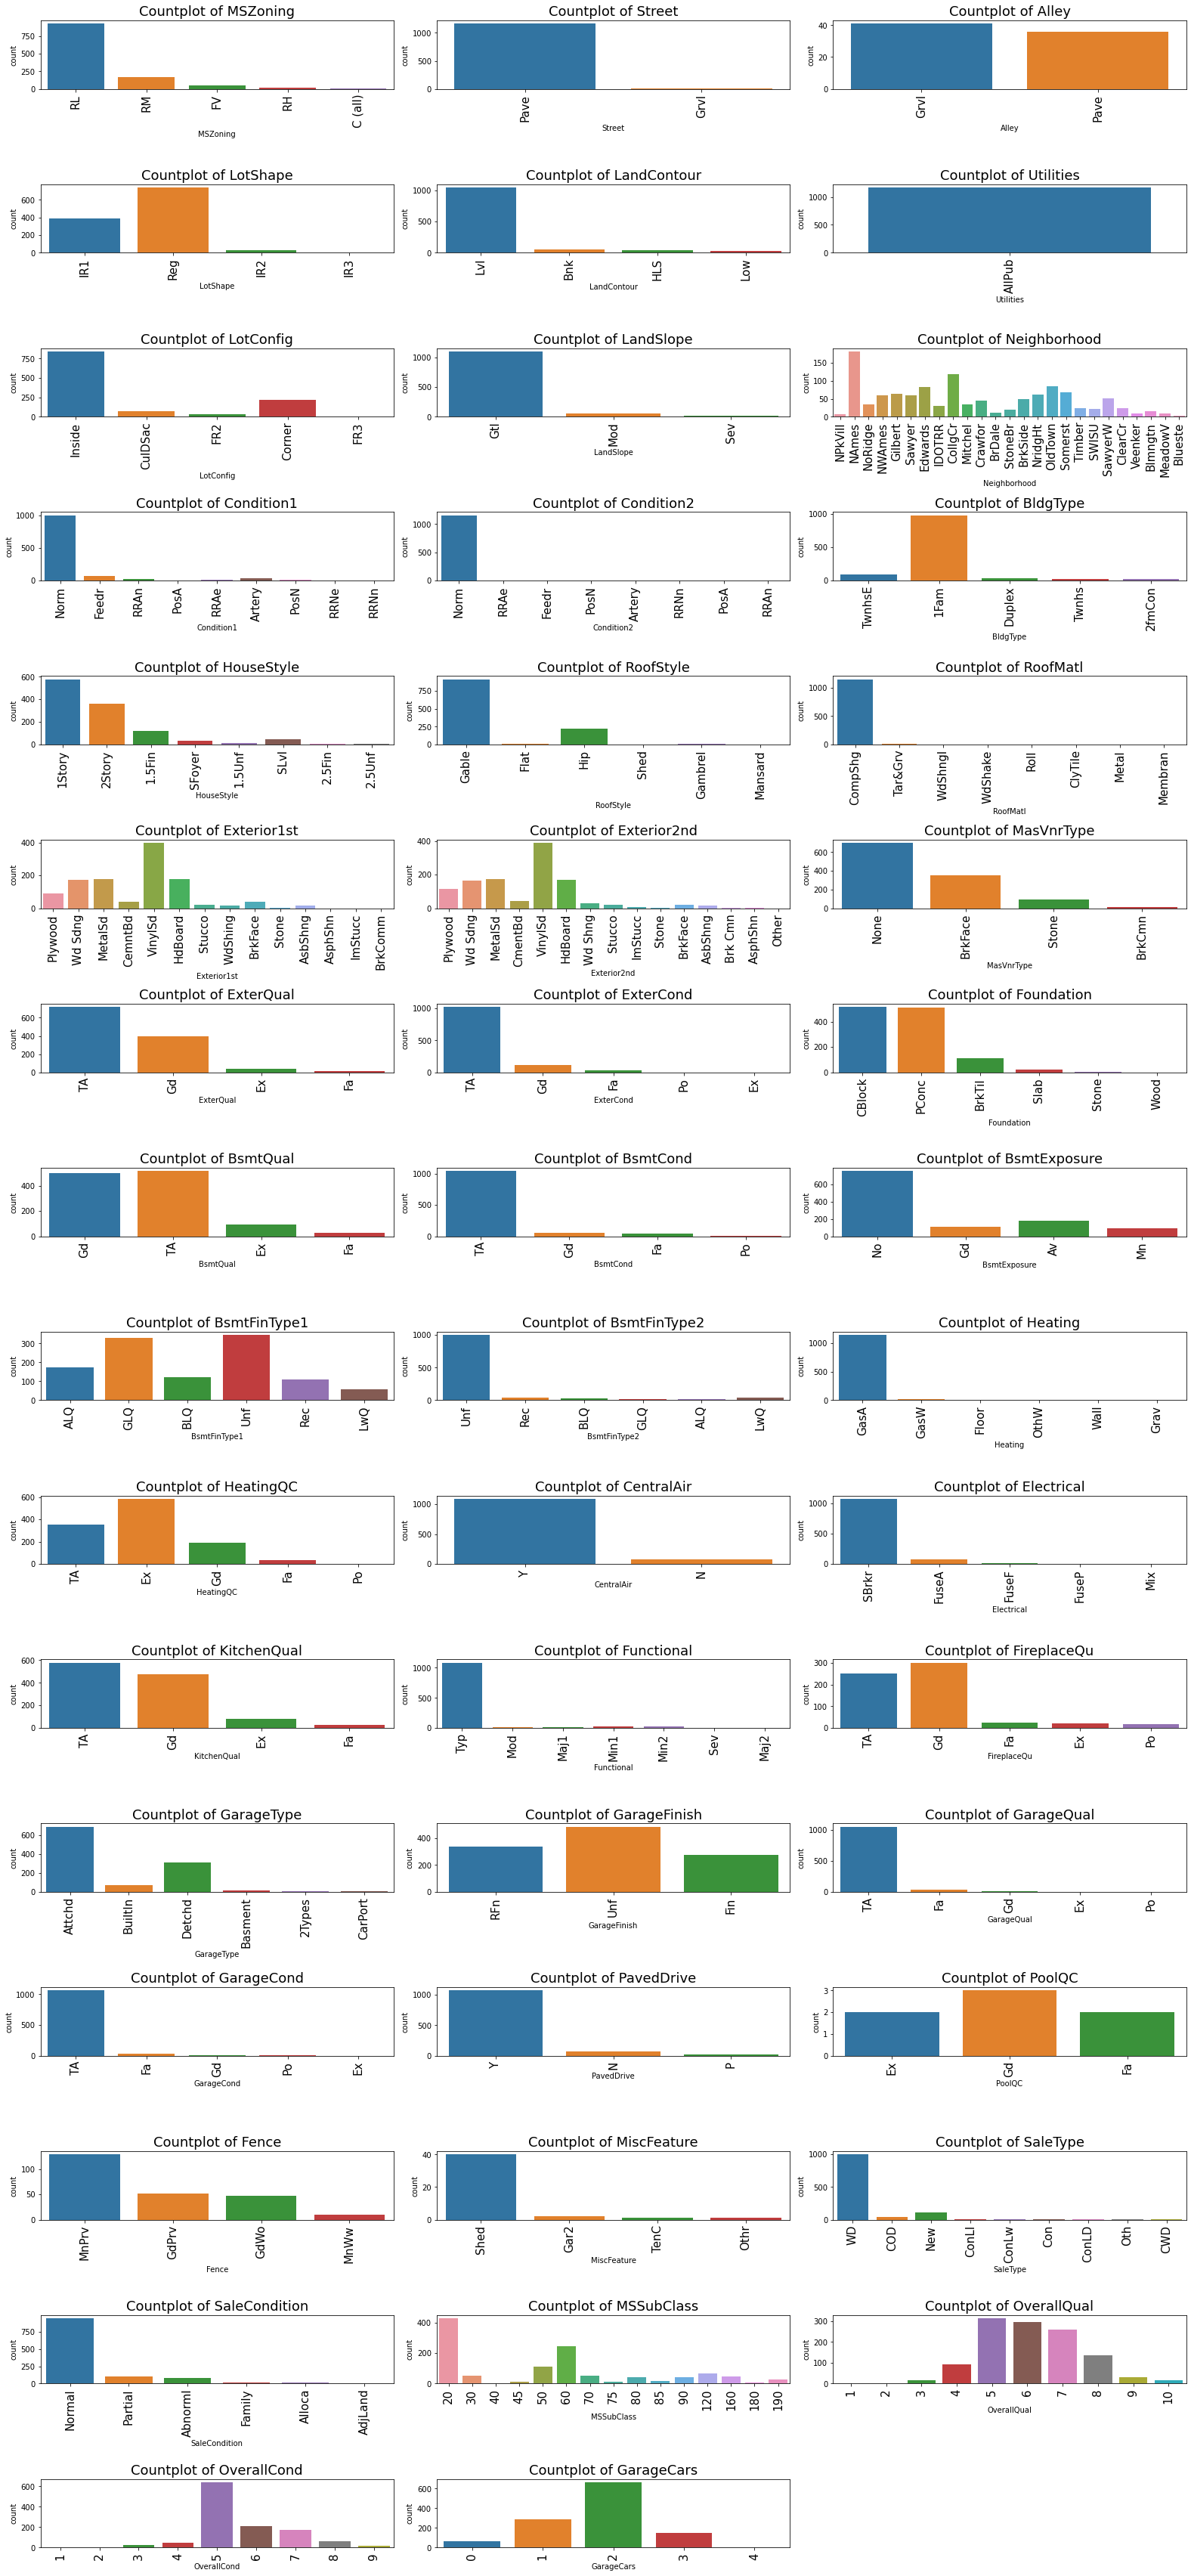

In [15]:
plt.figure(figsize=(22,300))
for i in range(len(col)):
  plt.subplot(100,3,i+1)
  sns.countplot(data[col[i]])
  plt.title(f"Countplot of {col[i]}",fontsize=18)
  plt.xticks(rotation=90,fontsize=15)
  plt.tight_layout()

### Obseravtion
1-From MSZoning i can say most of the people like house that have zone Residential Low Density, low density says people like to live in more space like villas

2-From Street i can say most of the people like to have home that are paved

3-From Type of alley access to property i can say mostly people like to have home at grvl

4-From lotshape i can say mostly people like reg and very less people who like to live in IR2,IR3

5-From LandContour: Flatness of the property i can say mostly people like to live in Near Flat/Level

6-From Lot configuration i can say mostly people like inside lot and some people like 20% of people like corner plot

7-From LandSlope: Slope of property i can say mostly 90% of people like Gentle slope

8-From Neighborhood: Physical locations within Ames city limitsi can say mostly people like to have have at North Ames after this people also like College Creek

9-From Condition1: Proximity to various conditions i can say mostly people like Normal and same with condition 2

10-From BldgType: Type of dwelling i can say mostly people like Single-family Detached

11-From HouseStyle: Style of dwelling i can say moslty people like onestory and twostory more

12-From RoofStyle: Type of roof i can say mostly people like Gable style

13-From RoofMatl: Roof material i can say mostly people like clay or tile on roof

14-From Exterior1st and Exterior2nd i can say moslty people like Vinyl Siding and people also like Metal Siding and hard bord

15-From MasVnrType: Masonry veneer type i can say people like None

16-Form exterqual and extercond i can say mostly people are happy with Average quality

17-From Foundation: Type of foundation i can say moslty people like Cinder Block and Poured Contrete

18-From bsmntqual and bsmtcond i can say people like Good (90-99 inches) and typical also

19-From BsmtExposure: Refers to walkout or garden level walls people like No Exposure

20-From BsmtFinType1: Rating of basement finished area i can say moslty people like Good Living Quarters and unfinished

21-From BsmtFinType2 i can say people like good living quarters

22-From CenteralAir i can say moslty people like to lave centeralair

23-From Electrical: Electrical system i can say people like SBrkr Standard Circuit Breakers & Romex

24-From Countplot of Garage type i can say people love to have a home that have garage Attached to home

25-From Salestype i cna say people love to have a home that have Warranty Deed - Conventional

26-From salesconditon i can say people love to have a home that have normal condition

In [20]:
data2=data.select_dtypes(exclude='object')

In [21]:
col1=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

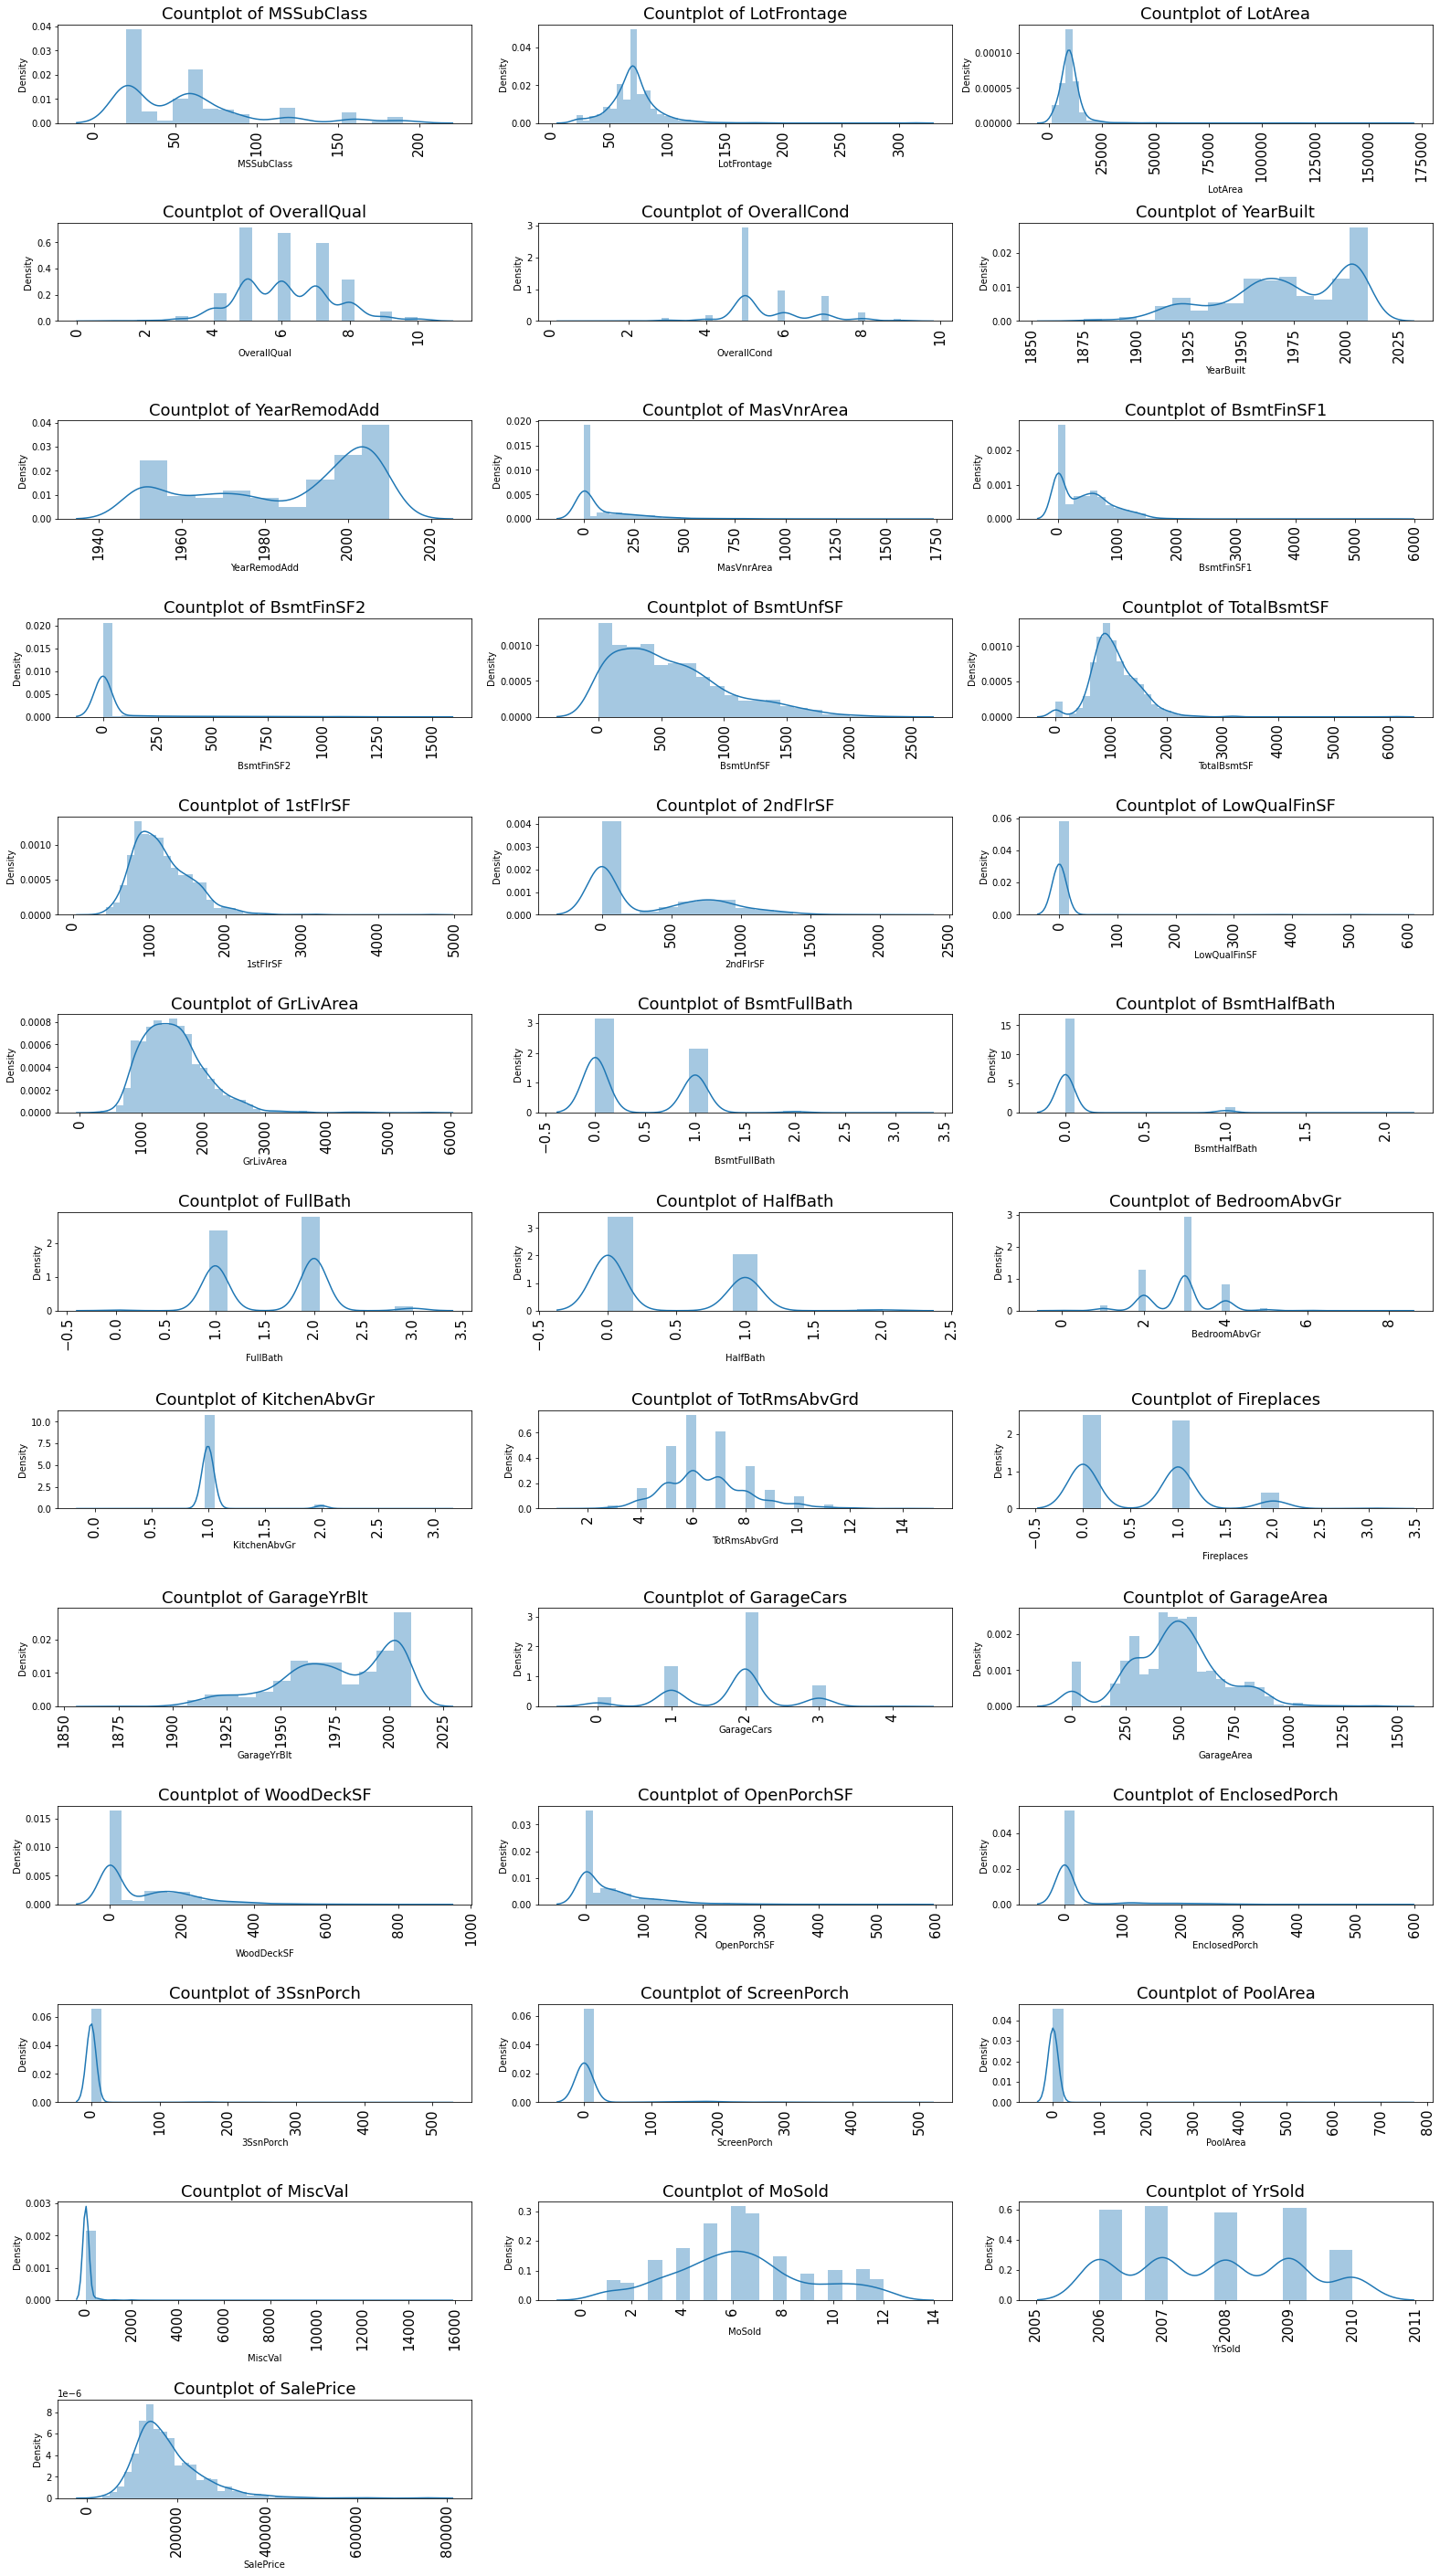

In [22]:
plt.figure(figsize=(22,300))
for i in range(len(col1)):
  plt.subplot(100,3,i+1)
  sns.distplot(data[col1[i]])
  plt.title(f"Countplot of {col1[i]}",fontsize=18)
  plt.xticks(rotation=90,fontsize=15)
  plt.tight_layout()

## Observation
1-From LotFrontage i cna say mostly people have value between 60-40

2-From LotArea i can say the value is between 0-25000

3-From Total square feet of basement area i can say the value is mostly in between 100-2000 and moslty people have the basement of size 800-1100

4-From grlivarea i can say moslty people have the are between 1200-1900

5-From GarageArea i can say mostly people like to have area between 450-600

6-From saleprice i can say moslty people buy home between price 140000-190000 and also it is right skewed

# Bivariate Analysis

Text(0, 0.5, 'Average SalesPrice')

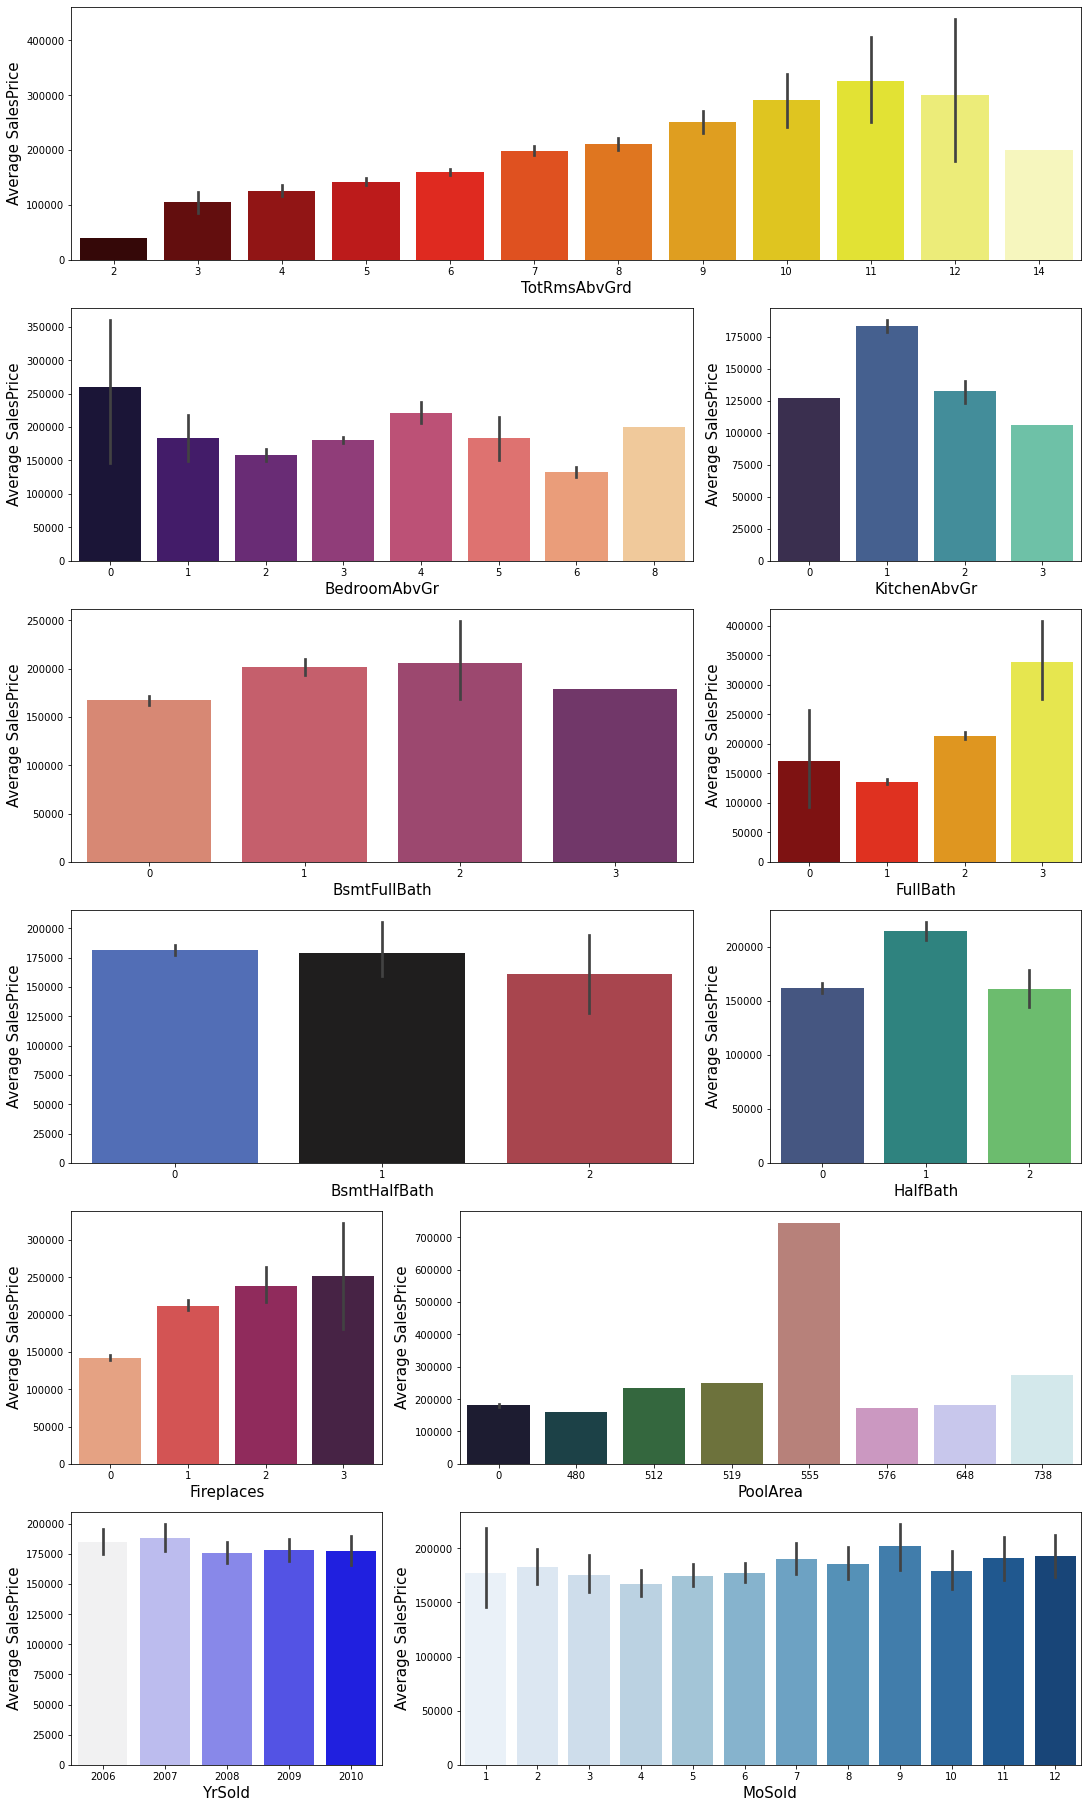

In [29]:
fig=plt.figure(constrained_layout=True,figsize=(15,25))
gs=GridSpec(6,3,figure=fig)

plt.subplot(gs[0,:])
a1=sns.barplot(data=data,x="TotRmsAbvGrd",y="SalePrice",estimator=mean,palette='hot')
plt.xlabel("TotRmsAbvGrd",fontsize=15)
plt.ylabel("Average SalesPrice",fontsize=15)

plt.subplot(gs[1,:-1])
a1=sns.barplot(data=data,x="BedroomAbvGr",y="SalePrice",estimator=mean,palette='magma')
plt.xlabel("BedroomAbvGr",fontsize=15)
plt.ylabel("Average SalesPrice",fontsize=15)

plt.subplot(gs[1,-1])
a1=sns.barplot(data=data,x="KitchenAbvGr",y="SalePrice",estimator=mean,palette='mako')
plt.xlabel("KitchenAbvGr",fontsize=15)
plt.ylabel("Average SalesPrice",fontsize=15)

plt.subplot(gs[2,:-1])
a1=sns.barplot(data=data,x="BsmtFullBath",y="SalePrice",estimator=mean,palette='flare')
plt.xlabel("BsmtFullBath",fontsize=15)
plt.ylabel("Average SalesPrice",fontsize=15)

plt.subplot(gs[2,-1])
a1=sns.barplot(data=data,x="FullBath",y="SalePrice",estimator=mean,palette='hot')
plt.xlabel("FullBath",fontsize=15)
plt.ylabel("Average SalesPrice",fontsize=15)

plt.subplot(gs[3,:-1])
a1=sns.barplot(data=data,x="BsmtHalfBath",y="SalePrice",estimator=mean,palette='icefire')
plt.xlabel("BsmtHalfBath",fontsize=15)
plt.ylabel("Average SalesPrice",fontsize=15)

plt.subplot(gs[3,-1])
a1=sns.barplot(data=data,x="HalfBath",y="SalePrice",estimator=mean,palette='viridis')
plt.xlabel("HalfBath",fontsize=15)
plt.ylabel("Average SalesPrice",fontsize=15)

plt.subplot(gs[4,:-2])
a1=sns.barplot(data=data,x="Fireplaces",y="SalePrice",estimator=mean,palette='rocket_r')
plt.xlabel("Fireplaces",fontsize=15)
plt.ylabel("Average SalesPrice",fontsize=15)

plt.subplot(gs[4,-2:])
a1=sns.barplot(data=data,x="PoolArea",y="SalePrice",estimator=mean,palette='cubehelix')
plt.xlabel("PoolArea",fontsize=15)
plt.ylabel("Average SalesPrice",fontsize=15)

plt.subplot(gs[5,:-2])
a1=sns.barplot(data=data,x="YrSold",y="SalePrice",estimator=mean,palette='light:b')
plt.xlabel("YrSold",fontsize=15)
plt.ylabel("Average SalesPrice",fontsize=15)

plt.subplot(gs[5,-2:])
a1=sns.barplot(data=data,x="MoSold",y="SalePrice",estimator=mean,palette='Blues')
plt.xlabel("MoSold",fontsize=15)
plt.ylabel("Average SalesPrice",fontsize=15)

## Obseravtion
1-Total Rooms Above Ground-As the room no. increasing the average price is also increasing till 11th room after that price start decreasing

2-Bedroom ABove Ground-For the 0,4,8 Bedroom price is high and price is very less for 6 and 2

3-Kitchen Above Ground-as the no of kitchen is increasing the price is reducing and mostly people take one kitchen only

4-In Basement full bathrrom and half bathrooms as the bathroom size increasing the price is also increasing

5-Fireplaces-As the fireplaces increasing the sale price is also increasing

6-PoolArea-as big the pool the more costly the house

7-YRsold-the price was high in 2006 as comapre to old year prices descresed in 2008-10

8-MOSold-most of the people who sold there home in 09 month they got high price and people who sold there home on 4th month got less price

Text(0.5, 1.0, 'Land Slope')

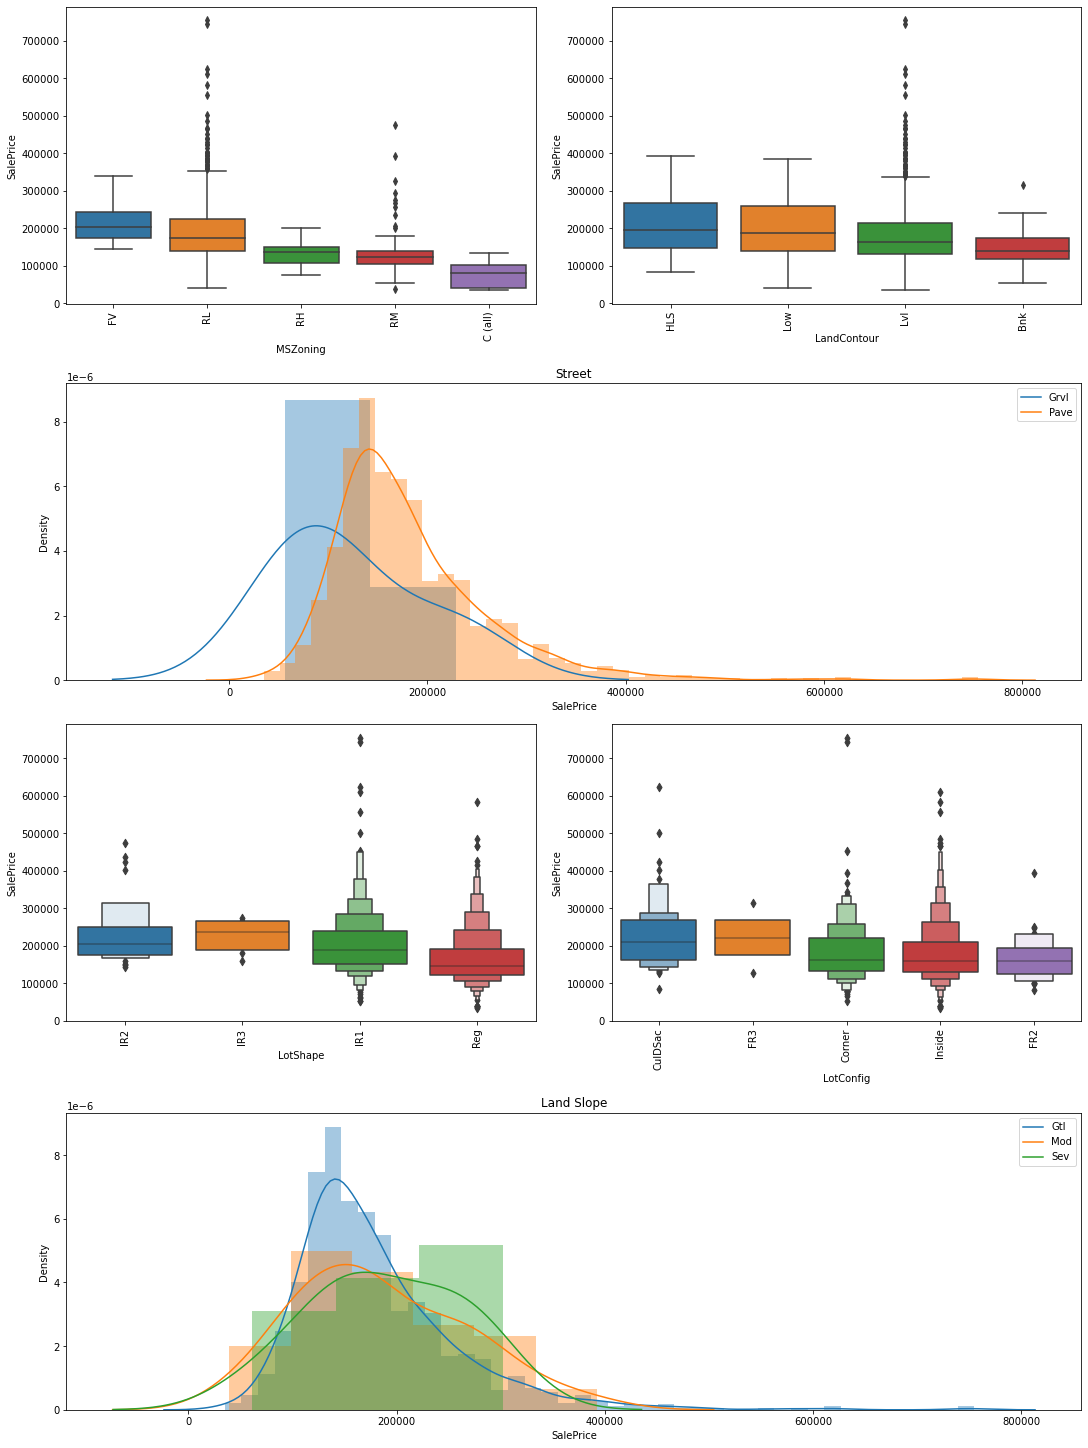

In [30]:
fig=plt.figure(constrained_layout=True,figsize=(15,20))
gs=gridspec.GridSpec(4,2,figure=fig)

plt.subplot(gs[0,0])
table=data.groupby(['MSZoning'],as_index=False)['SalePrice'].mean().sort_values(by='SalePrice',ascending=False)
a1=sns.boxplot(data=data,x='MSZoning',y='SalePrice',order=table['MSZoning'].to_list())
a1.set_xticklabels(a1.get_xticklabels(),rotation=90)

plt.subplot(gs[0,1])
table=data.groupby(['LandContour'],as_index=False)['SalePrice'].mean().sort_values(by='SalePrice',ascending=False)
a1=sns.boxplot(data=data,x='LandContour',y='SalePrice',order=table['LandContour'].to_list())
a1.set_xticklabels(a1.get_xticklabels(),rotation=90)

plt.subplot(gs[1,:])

a1=sns.distplot(data[data['Street']=='Grvl']['SalePrice'])
a1=sns.distplot(data[data['Street']=='Pave']['SalePrice'])
plt.legend('upper right',labels=['Grvl','Pave'])
plt.xlabel("SalePrice")
plt.title("Street")

plt.subplot(gs[2,0])
table=data.groupby(['LotShape'],as_index=False)['SalePrice'].mean().sort_values(by='SalePrice',ascending=False)
a1=sns.boxenplot(data=data,x='LotShape',y='SalePrice',order=table['LotShape'].to_list())
a1.set_xticklabels(a1.get_xticklabels(),rotation=90)

plt.subplot(gs[2,1])
table=data.groupby(['LotConfig'],as_index=False)['SalePrice'].mean().sort_values(by='SalePrice',ascending=False)
a1=sns.boxenplot(data=data,x='LotConfig',y='SalePrice',order=table['LotConfig'].to_list())
a1.set_xticklabels(a1.get_xticklabels(),rotation=90)

plt.subplot(gs[3,:])

a1=sns.distplot(data[data['LandSlope']=='Gtl']['SalePrice'])
a1=sns.distplot(data[data['LandSlope']=='Mod']['SalePrice'])
a1=sns.distplot(data[data['LandSlope']=='Sev']['SalePrice'])
plt.legend('upper right',labels=['Gtl','Mod','Sev'])
plt.xlabel("SalePrice")
plt.title("Land Slope")

## Obseravtions
1-MSZoning-Floating Village Residential zone (FV) is having higher sale price of around 2 lakhs. While Commercial Zones are Having the lowest sale prices and we see a varaition in sale prices in different zones which makes it an important feature foe our prediction.

2-LandCountour-if the house has significant slope on both sides (HLS) or in nearly flat (Low),sale prices is more. For depressed and blanked slopes,Sale price fall down

3-Street-For flat stones or bricks access,Price is higher and majority of houses with gravel have price around 2 lakhs but as there is very less data for gravel street type this feature is not that important

4-LotShape-We can see that houses with regular Shapes have low price and as the irregularity increases, the average sale price of the house also increases

5-LotConfig-The configuration of the lot does not appear to vary the prices.the property with cul de sac and fr3 configuration on average are having high value than the other configuration

6-LandSlope-Most of the properties having gentle slope and are lowest prices,while properties having moderate or severe slope have higher value.

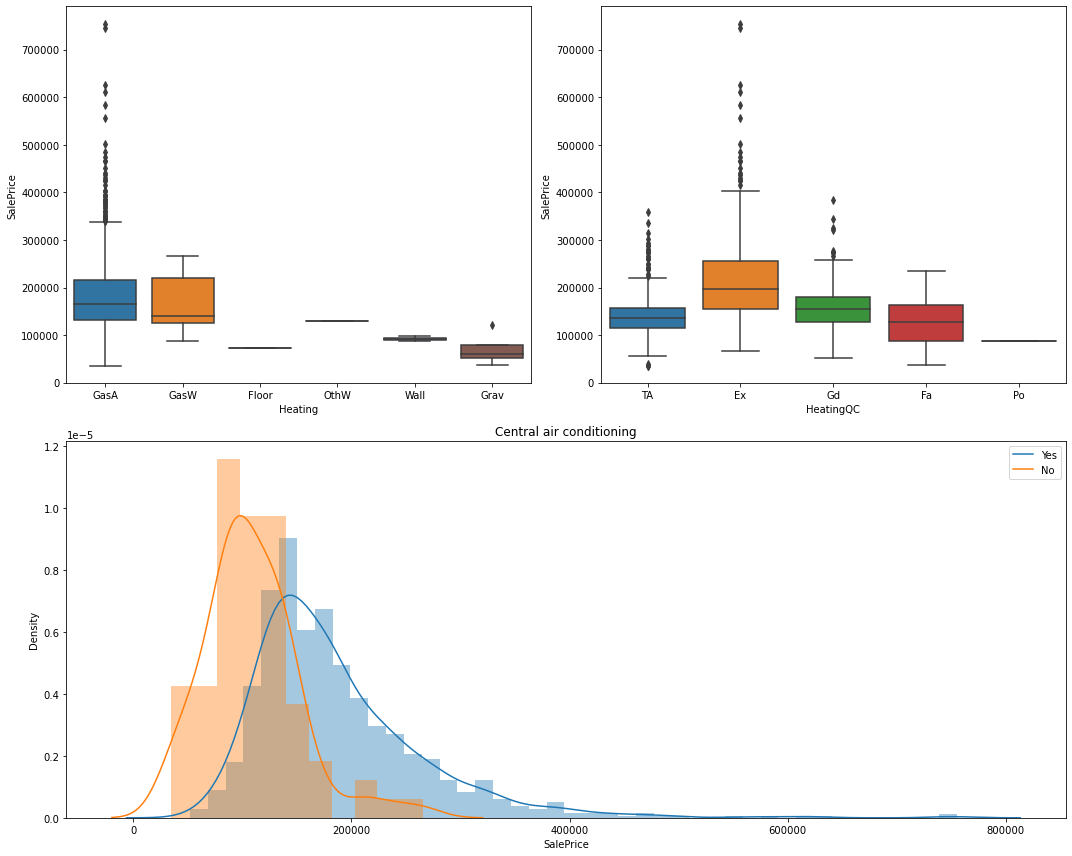

In [31]:
fig=plt.figure(tight_layout=True,figsize=(15,12))
gs=gridspec.GridSpec(2,2)
plt.subplot(gs[0,0])
ax1=sns.boxplot(data=data,x='Heating',y='SalePrice')

plt.subplot(gs[0,1])
ax1=sns.boxplot(data=data,x='HeatingQC',y='SalePrice')

plt.subplot(gs[1,:])
sns.distplot(data[data['CentralAir']=='Y']['SalePrice'])
sns.distplot(data[data['CentralAir']=='N']['SalePrice'])
plt.legend('upper right',labels=['Yes','No'])
plt.xlabel("SalePrice")
plt.title("Central air conditioning")
px.histogram(data,x='SalePrice',color='Electrical',barmode='overlay',title='Electrical System')

## Observation
1-Electrical-Most of the properties have standard circuit breakers and having highest average sale price of 170000.

Properties with poor fuse box system and mixed system have less than 10000 sale price.

2-Heating Quality-It can be clearly seen in the box plot.

3-Heating-Heating in the wall or hot water/steam is associated with very low houses prices. Gas Formed warm air appears to drive a higher sales price

4-Central AC- The properties which have AC will have higher price that the ones which dont have

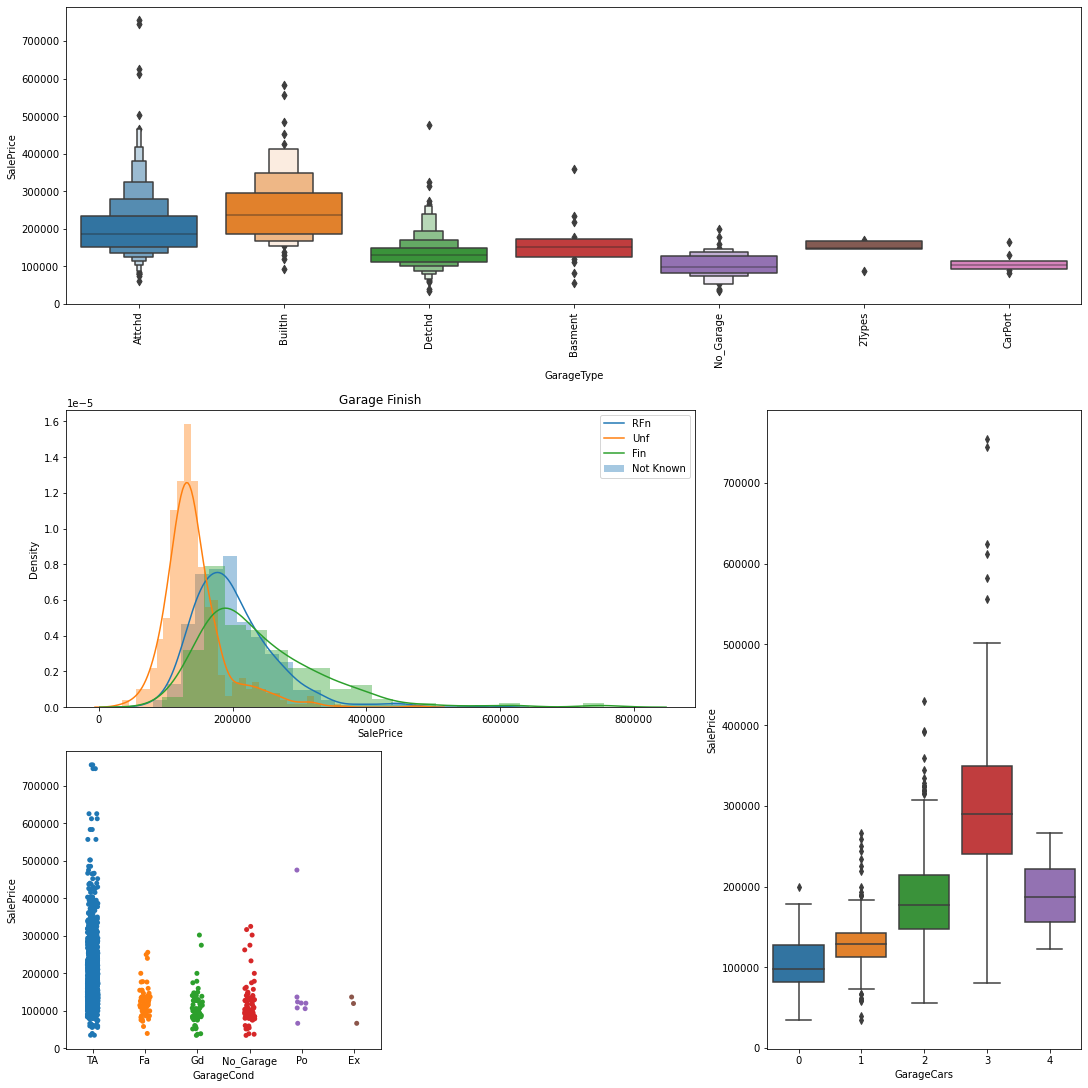

In [32]:
fig=plt.figure(constrained_layout=True,figsize=(15,15))
gs=GridSpec(3,3,figure=fig)

plt.subplot(gs[0,:])
a1=sns.boxenplot(data=data,x='GarageType',y='SalePrice')
a1.set_xticklabels(a1.get_xticklabels(),rotation=90)

plt.subplot(gs[1,:-1])
sns.distplot(data[data['GarageFinish']=='RFn']['SalePrice'])
sns.distplot(data[data['GarageFinish']=='Unf']['SalePrice'])
sns.distplot(data[data['GarageFinish']=='Fin']['SalePrice'])
sns.distplot(data[data['GarageFinish']=='Not Known']['SalePrice'])

plt.legend('upper right',labels=['RFn','Unf','Fin','Not Known'])
plt.xlabel("SalePrice")
plt.title("Garage Finish")

plt.subplot(gs[1:,-1])
a1=sns.boxplot(data=data,x="GarageCars",y="SalePrice")


plt.subplot(gs[-1,0])
a1=sns.stripplot(data=data,x="GarageQual",y="SalePrice")


plt.subplot(gs[-1,0])
a1=sns.stripplot(data=data,x="GarageCond",y="SalePrice")

## Obseravtion
1-Garage Type-Houses with built in or attached garages tend to have the highest prices. Those without a garage or a car port tend to have the lowest prices.

2-Garage Finish-Finished and roughly finished garages account for higher sale price than unfinished ones.and the properties which dont have a garage have the lowest price.

3-GarageCars-here garage cars refers to size of garage in car capacity so higher the number more the sale price

Text(0.5, 0.98, 'Sale Type and Condition')

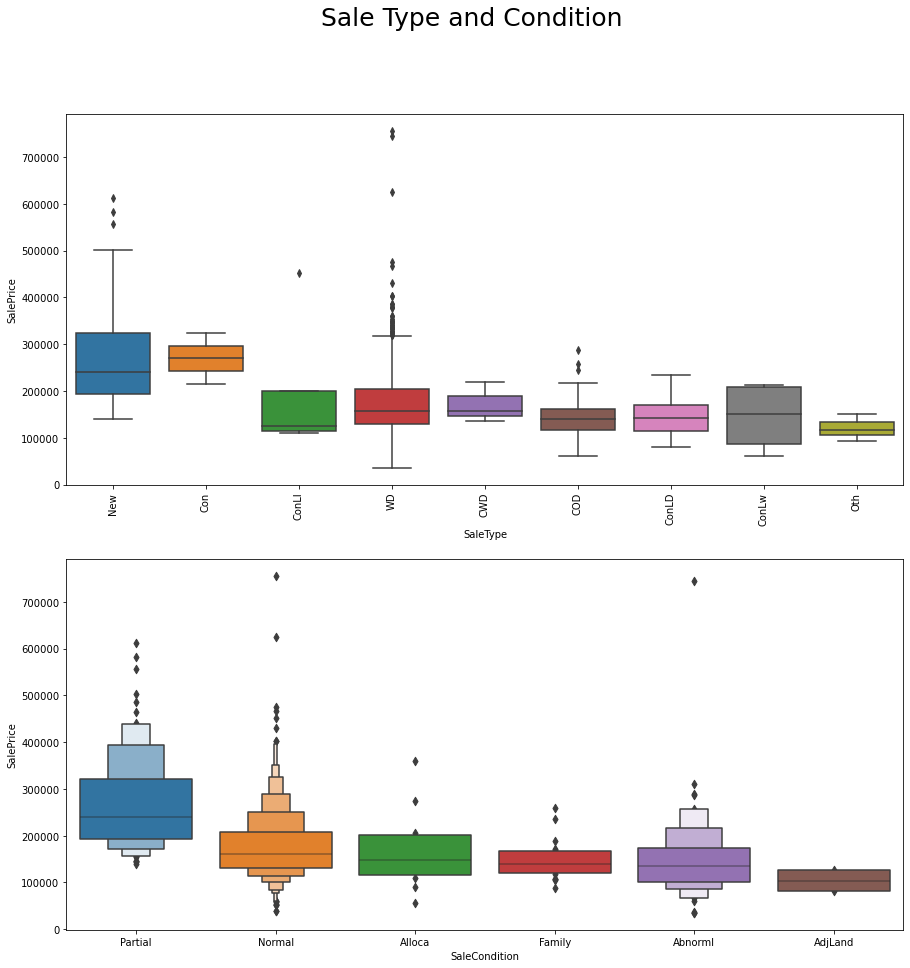

In [33]:
fig=plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
table=data.groupby(['SaleType'],as_index=False)['SalePrice'].mean().sort_values(by='SalePrice',ascending=False)
a1=sns.boxplot(data=data,x='SaleType',y='SalePrice',order=table['SaleType'].to_list())
a1.set_xticklabels(a1.get_xticklabels(),rotation=90)

plt.subplot(2,1,2)
table=data.groupby(['SaleCondition'],as_index=False)['SalePrice'].mean().sort_values(by='SalePrice',ascending=False)
a1=sns.boxenplot(data=data,x='SaleCondition',y='SalePrice',order=table['SaleCondition'].to_list())

fig.suptitle("Sale Type and Condition",fontsize=25)

## Obseravtion
1-Sale Type-Most of the properties are on warranty deed sale. The manor in which the house is sold appears to have different price ranges

2-Sale Condition-if the house to be sold is in partial or normal condition,the price will definitely be higher than the rest of the conditions.

bases on the analysis of the above categorical features,we can conclude that the following features are important in predicting the sale price.

1-MSSubclass and mszoning

2-all the quality features,as the houses with average,good,excellent quality features will have higher sale price

3-Fireplaces and garage cars,more the no. , higher the sale price

4-we also saw variation in absement exposure

5-And lastly sale type and sale conditon are also one of the important features

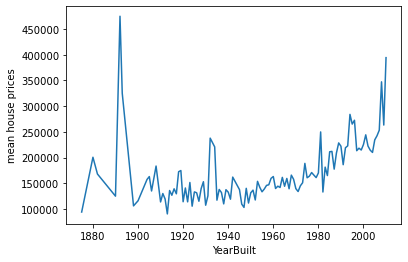

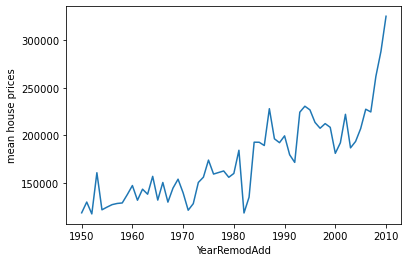

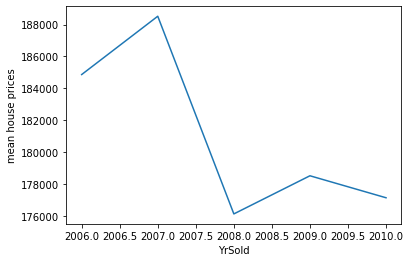

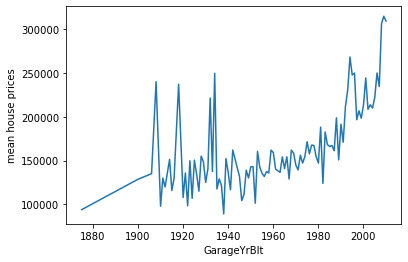

In [34]:
year_features=['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt']
for feature in year_features:
  ax=data.groupby([feature])['SalePrice'].mean().plot()
  plt.ylabel("mean house prices")
  plt.show()

## Obseravtion
WE can see that the houses and garage which were built during 0s have less sale price than the newer ones

with every year,house price increases

But if see,Year Sold feature the price fall down with each year which is strange.

Due to the strange behaviour in year sold,we subtract each feature with year sold

# Multivariate Analysis

In [35]:
data.describe() 

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000  1168.000000    1168.000000  1168.000000   
mean    724.136130    56.767979    70.807363   10484.749144     6.104452   
std     416.159877    41.940650    22.440317    8957.442311     1.390153   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     360.500000    20.000000    60.000000    7621.500000     5.000000   
50%     714.500000    50.000000    70.000000    9522.500000     6.000000   
75%    1079.500000    70.000000    79.250000   11515.500000     7.000000   
max    1460.000000   190.000000   313.000000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1168.000000  1168.000000   1168.000000  1168.000000  1168.000000  ...   
mean      5.595890  1970.930651   1984.758562   101.696918   444.726027  ...   
std       1.124343    30.145255     20.785185   182.218483   462.664785  ...   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000  ...   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000  ...   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

## Observations:
-> Maximum standard deviation of 8957.44 is observed in LotArea column.

-> Maximum SalePrice of a house observed is 755000 and minimum is 34900.

-> In the columns MSSubclass, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfsF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, HalfBath, TotRmsAbvGrd, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, Miscval, salePrice mean is considerably greater than median so the columns are positively skewed.

-> In the columns FullBath, BedroomAbvGr, Fireplaces, Garagecars, GarageArea, YrSold Median is greater than mean so the columns are negatively skewed.

-> In the columns MSSubClass, LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtHalfBath, BedroomAbvGr, ToRmsAbvGrd, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, MiscVal, SalePrice there is considerable difference between the 75 percentile and maximum so outliers are present.

In [36]:
corr=data.corr()
corr

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.004259    -0.006165 -0.029212    -0.036965   
MSSubClass     0.004259    1.000000    -0.336234 -0.124151     0.070462   
LotFrontage   -0.006165   -0.336234     1.000000  0.296790     0.229981   
LotArea       -0.029212   -0.124151     0.296790  1.000000     0.107188   
OverallQual   -0.036965    0.070462     0.229981  0.107188     1.000000   
OverallCond    0.039761   -0.056978    -0.047851  0.017513    -0.083167   
YearBuilt     -0.016942    0.023988     0.112000  0.005506     0.575800   
YearRemodAdd  -0.018590    0.056618     0.089513  0.027228     0.555945   
MasVnrArea    -0.061397    0.028215     0.188273  0.120192     0.403985   
BsmtFinSF1     0.003868   -0.052236     0.227732  0.221851     0.219643   
BsmtFinSF2     0.005269   -0.062403     0.001253  0.056656    -0.040893   
BsmtUnfSF     -0.019494   -0.134170     0.115628  0.006600     0.308676   
TotalBsmtSF   -0.013812   -0.214042     0.356180  0.259733     0.528285   
1stFlrSF       0.009647   -0.227927     0.402864  0.312843     0.458758   
2ndFlrSF      -0.029671    0.300366     0.089816  0.059803     0.316624   
LowQualFinSF  -0.070180    0.053737     0.008087 -0.001915    -0.039295   
GrLivArea     -0.024325    0.086448     0.374000  0.281360     0.599700   
BsmtFullBath   0.023027    0.004556     0.092807  0.142387     0.101732   
BsmtHalfBath  -0.043572    0.008207     0.001375  0.059282    -0.030702   
FullBath      -0.015187    0.140807     0.171842  0.123197     0.548824   
HalfBath      -0.028512    0.168423     0.047149  0.007271     0.296134   
BedroomAbvGr   0.009376   -0.013283     0.236946  0.117351     0.099639   
KitchenAbvGr   0.001216    0.283506    -0.002082 -0.013075    -0.178220   
TotRmsAbvGrd  -0.001613    0.051179     0.318941  0.184546     0.432579   
Fireplaces    -0.024175   -0.035792     0.228494  0.285983     0.390067   
GarageYrBlt    0.004935    0.032568     0.080350 -0.004754     0.555483   
GarageCars     0.007549   -0.027639     0.260224  0.158313     0.596322   
GarageArea     0.010048   -0.092408     0.322750  0.195162     0.566782   
WoodDeckSF    -0.027498   -0.022609     0.087267  0.216720     0.227137   
OpenPorchSF   -0.013642    0.017468     0.151044  0.093080     0.341030   
EnclosedPorch  0.004885   -0.004252     0.021103 -0.007446    -0.098374   
3SsnPorch     -0.021773   -0.043210     0.050499  0.025794     0.045919   
ScreenPorch    0.005169   -0.013291     0.030440  0.025256     0.059387   
PoolArea       0.065832    0.009583     0.195973  0.097107     0.072247   
MiscVal        0.001304   -0.023503    -0.002830  0.051679    -0.025786   
MoSold         0.023479   -0.016015     0.022579  0.015141     0.090638   
YrSold        -0.008853   -0.038595    -0.004162 -0.035399    -0.048759   
SalePrice     -0.023897   -0.060775     0.323851  0.249499     0.789185   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.039761  -0.016942     -0.018590   -0.061397    0.003868   
MSSubClass       -0.056978   0.023988      0.056618    0.028215   -0.052236   
LotFrontage      -0.047851   0.112000      0.089513    0.188273    0.227732   
LotArea           0.017513   0.005506      0.027228    0.120192    0.221851   
OverallQual      -0.083167   0.575800      0.555945    0.403985    0.219643   
OverallCond       1.000000  -0.377731      0.080669   -0.135133   -0.028810   
YearBuilt        -0.377731   1.000000      0.592829    0.318562    0.227933   
YearRemodAdd      0.080669   0.592829      1.000000    0.178583    0.114430   
MasVnrArea       -0.135133   0.318562      0.178583    1.000000    0.263377   
BsmtFinSF1       -0.028810   0.227933      0.114430    0.263377    1.000000   
BsmtFinSF2        0.044336  -0.027682     -0.044694   -0.064685   -0.052145   
BsmtUnfSF        -0.146384   0.155559      0.174732    0.108974   -0.499861   
TotalBsmtSF      -0.162481   0.386265      0.280720    0.362330    0

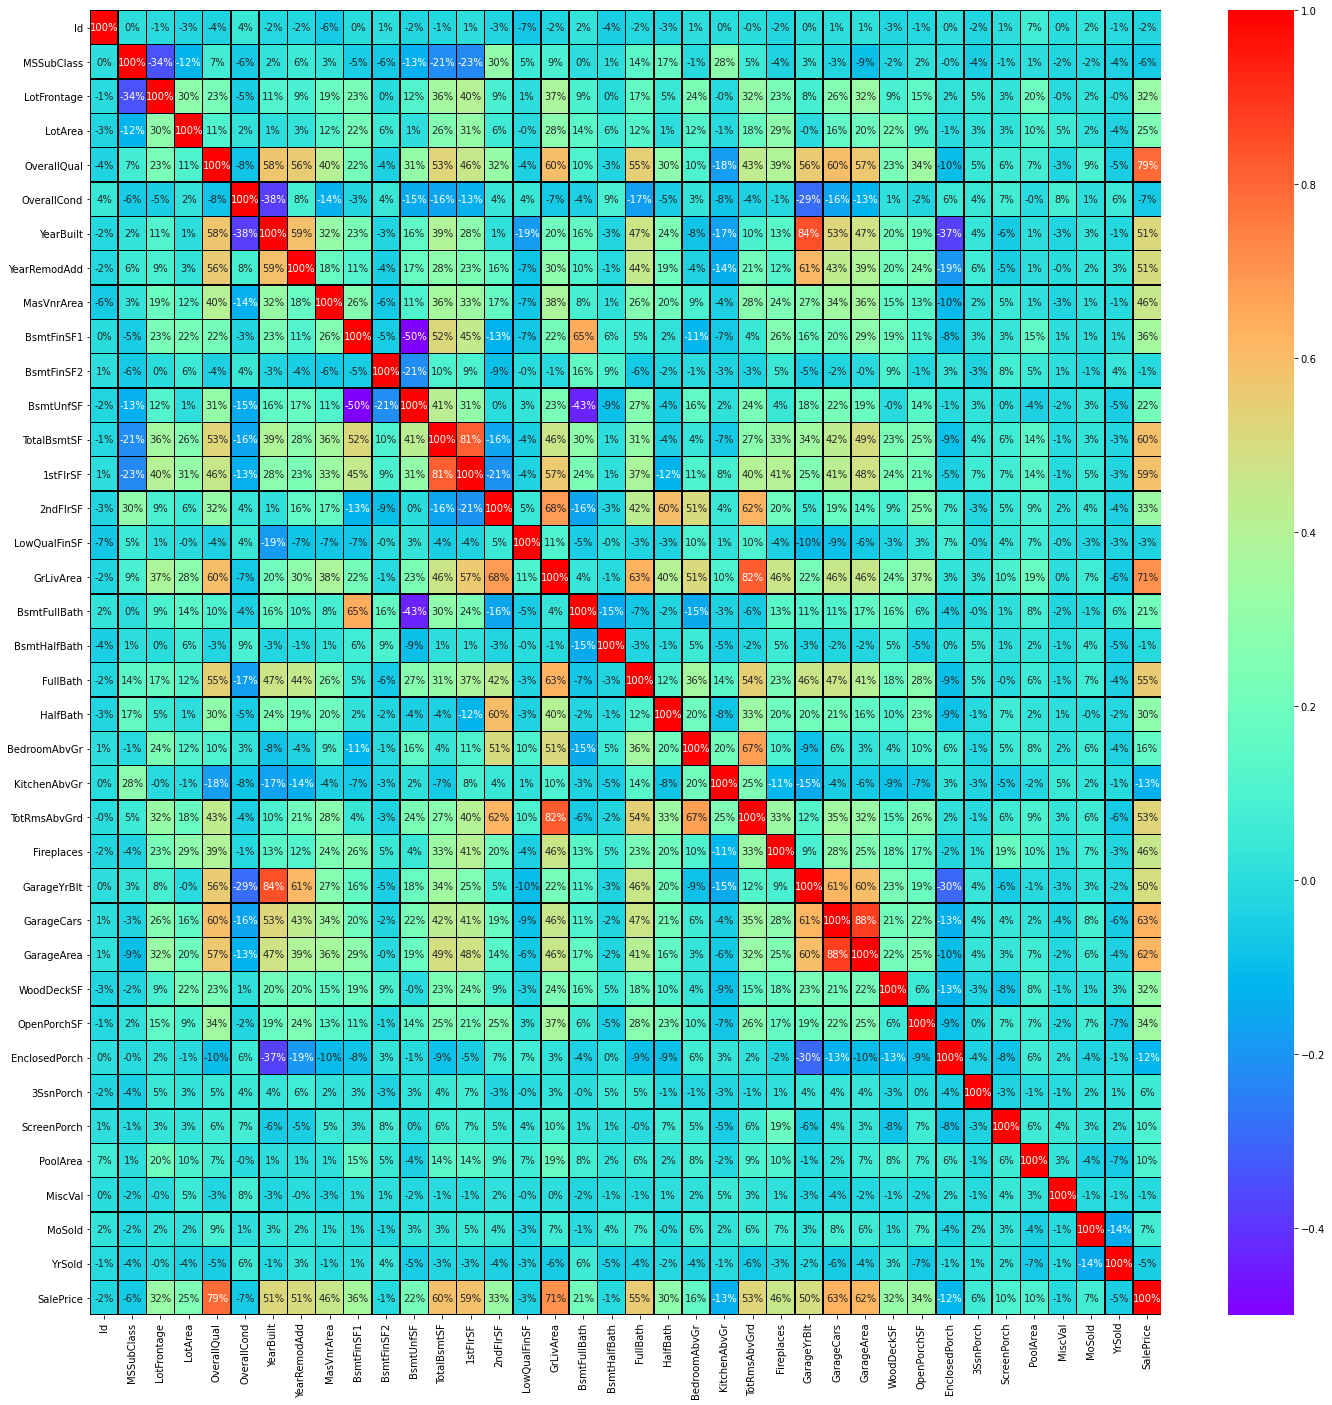

In [37]:
plt.figure(figsize=(24,24))
sns.heatmap(corr,linewidth=0.5,linecolor='black',fmt='.0%',cmap='rainbow',annot=True)
plt.show()

## Observations:
-> SalePrice is highly positively correlated with the columns OverallQual, YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageCars, GarageArea.

-> SalePrice is negatively correlated with OverallCond, KitchenAbvGr, Encloseporch, YrSold.

-> We observe multicollinearity in between columns, so we will be using Principal Component Analysis(PCA).

Text(0.5, 1.0, 'Correaltion with target variable SalePrice')

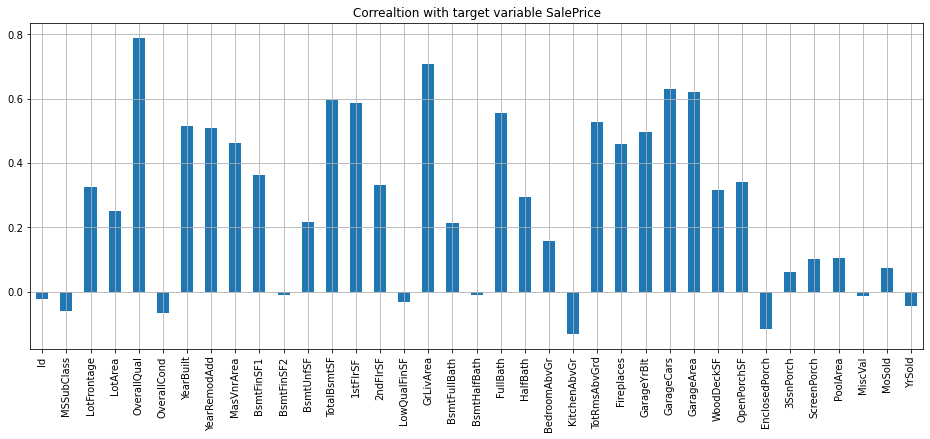

In [41]:
plt.figure(figsize=(16,6))
data.drop('SalePrice', axis=1).corrwith(data['SalePrice']).plot(kind='bar',grid=True)
plt.xticks(rotation=90)
plt.title("Correaltion with target variable SalePrice")

## Observations:
-> 'MSSubClass' ,'OverallCond' ,'OverallCond' ,'LowQualFinSF' ,'BsmtHalfBath' ,'KitchenAbvGr' ,'YrSold', 'EnclosedPorch', 'MiscVal' are negatively correlated with the target column,rest all are positively correlated

-> 'OverallQual' & 'GrLivArea' are highly positively correlated with target column

-> 'MSSubClass' ,'OverallCond' ,'OverallCond' ,'LowQualFinSF' ,'BsmtHalfBath' ,'YrSold', 'MiscVal', 'MoSold', '3SsnPorch' are least correlated with the target column

# Checking Skewness

In [42]:
data.skew()

Id                0.026526
MSSubClass        1.422019
LotFrontage       2.733440
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.835718
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -0.673163
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
S

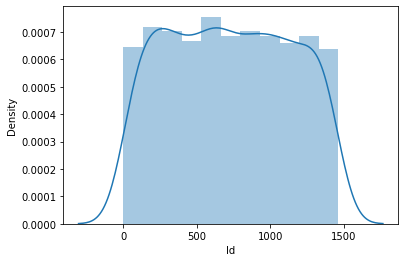

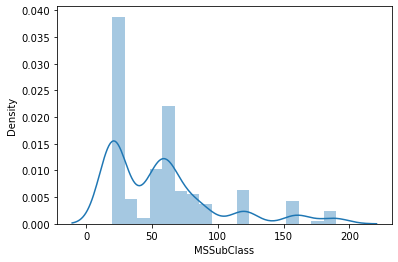

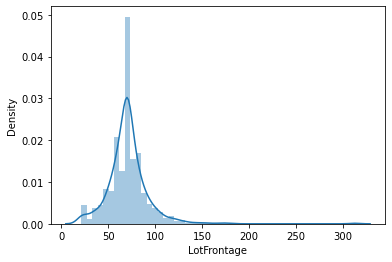

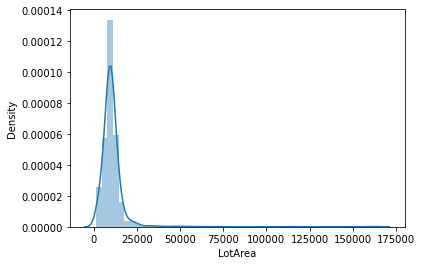

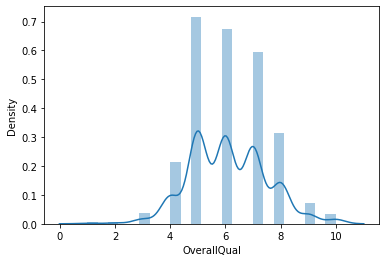

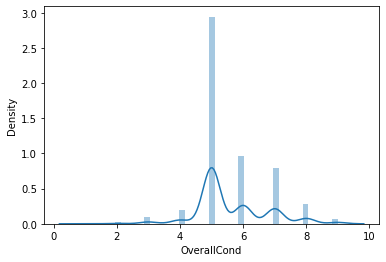

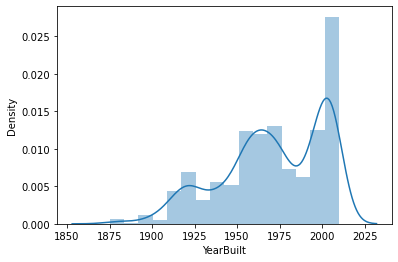

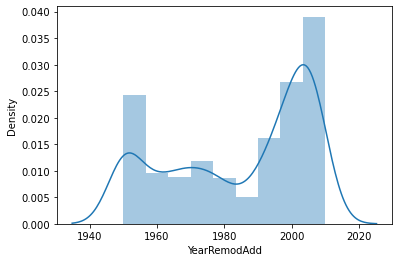

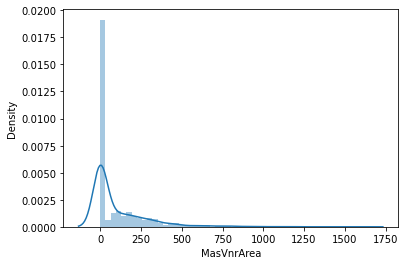

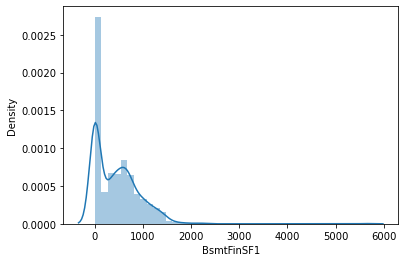

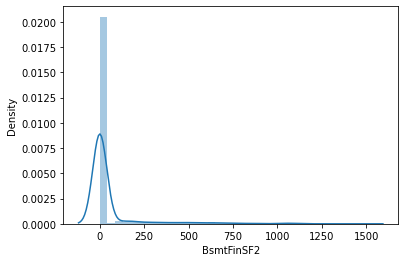

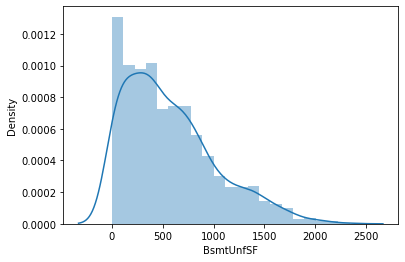

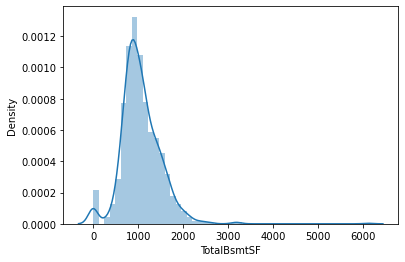

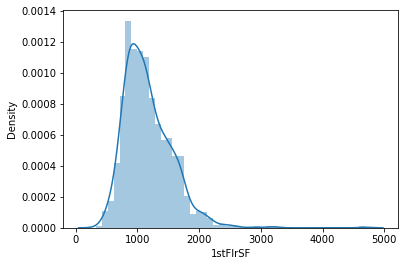

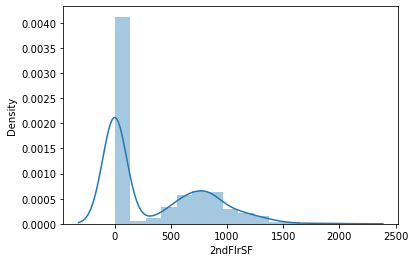

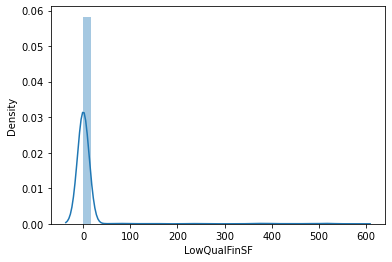

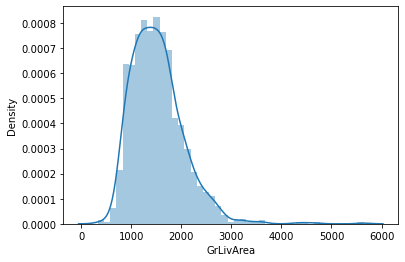

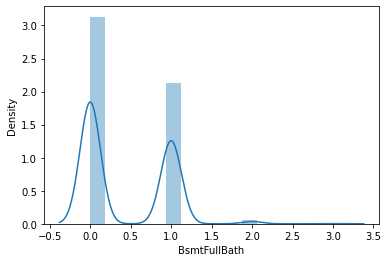

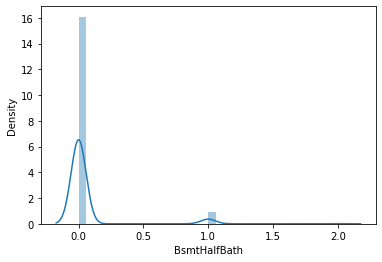

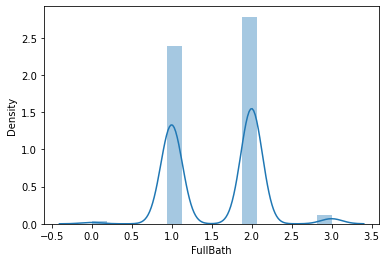

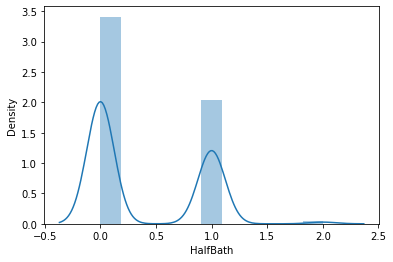

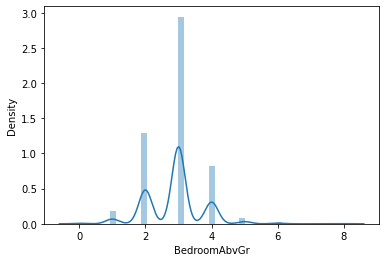

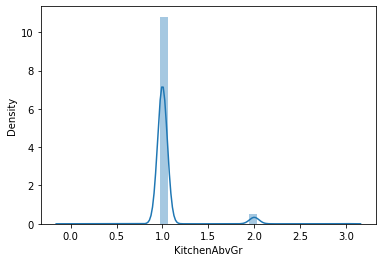

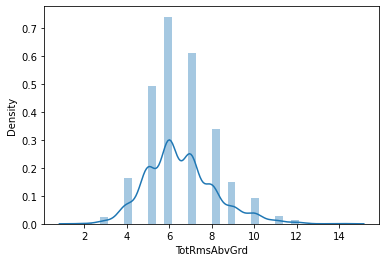

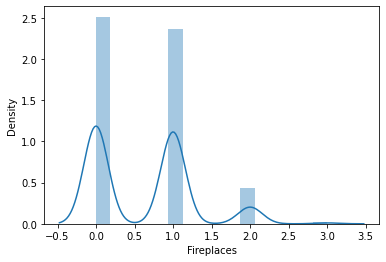

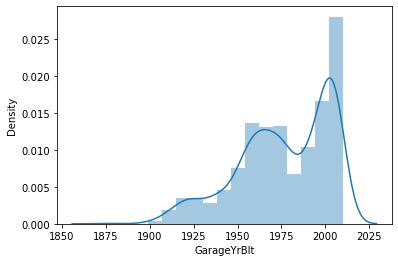

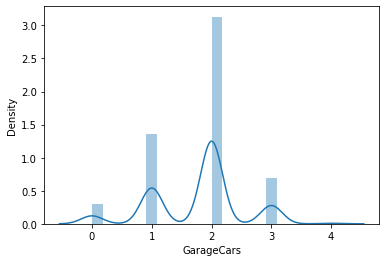

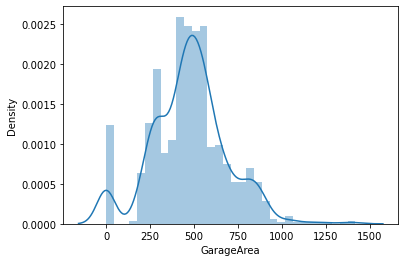

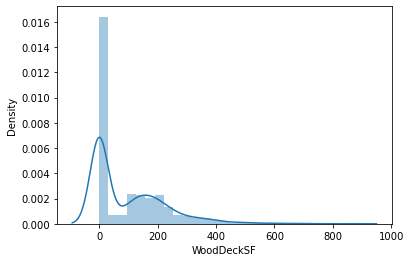

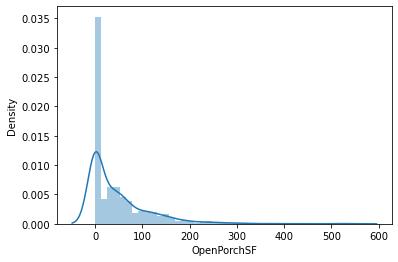

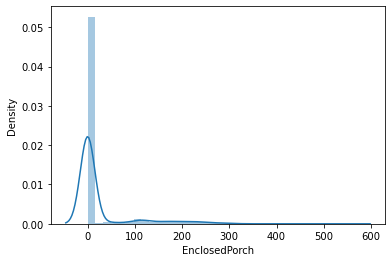

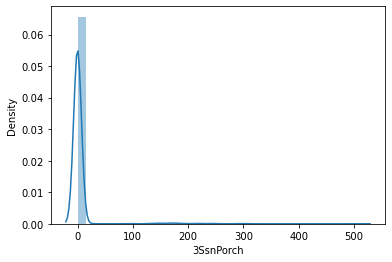

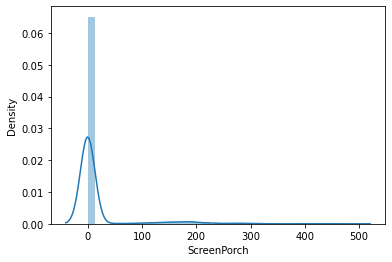

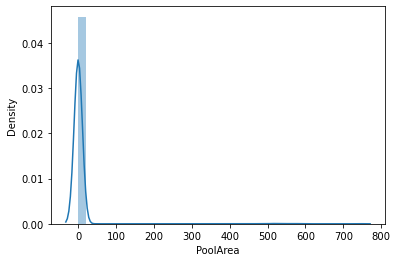

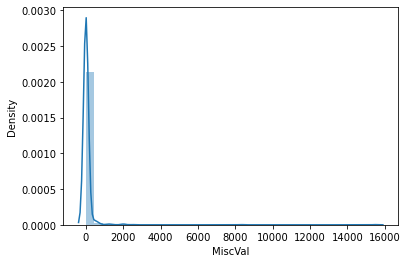

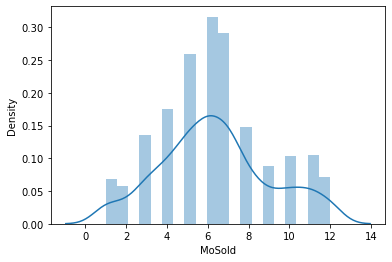

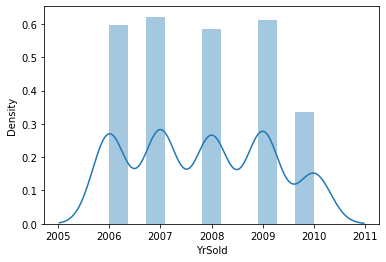

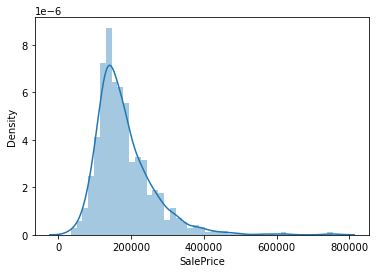

In [43]:
for col in data.describe().columns:
    sns.distplot(data[col])
    plt.show()

We can see that some of the curves are not normally distributed and it is due to the presence of high skewness and we need to handle them.

# Removing Skewness

In [48]:
class skewness_remove:
  def __init__(self,skew=0.5):
    self.skew=skew
  
  def fit(self,X,y=None):
    return self

  def transform(self,X):
    x=X.copy()
    X_num=X.select_dtypes(exclude='object')
    skewness=X_num.apply(lambda x:x.skew())
    skewness_col=skewness[abs(skewness)>=self.skew].index
    X[skewness_col]=power_transform(X[skewness_col])
    X=pd.DataFrame(X,columns=x.columns)
    X = pd.get_dummies(X)
    return X

In [44]:
data2=data.select_dtypes(exclude='object')

In [45]:
X_col=data2.columns.values

# OUTLIERS

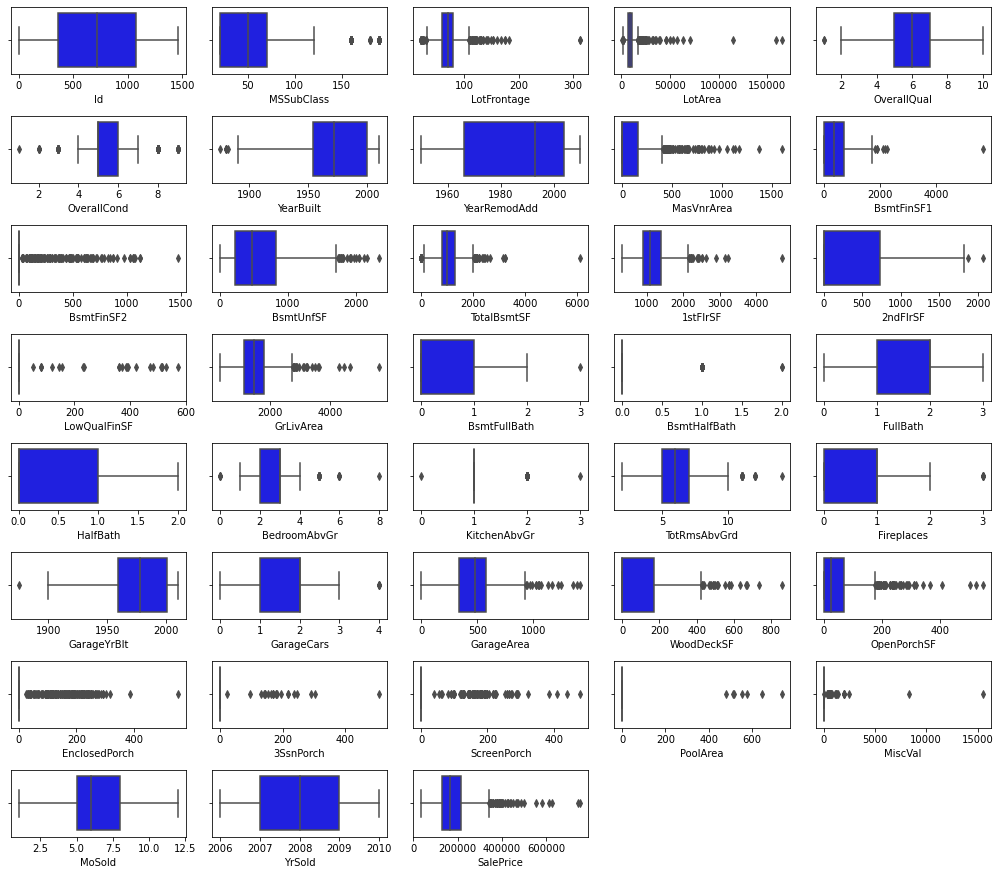

In [46]:
plt.figure(figsize=(14,30))
for i in range(0,len(X_col)):
  plt.subplot(20,5,i+1)
  ax=sns.boxplot(data2[X_col[i]],color='blue')
  plt.tight_layout()

There are many outliers in the given data, so we need to remove them.

# Removing Outliers

In [47]:
class remove_outliers:
  def __init__(self):
    pass
  def fit(self,X,y=None):
    return self
  def transform(self,X):
    for col in X.columns:
      percentile=X[col].quantile([0.01,0.98]).values
      X[col][X[col]<=percentile[0]]=percentile[0]
      X[col][X[col]>=percentile[1]]=percentile[1]
    return X

Here i am using percentile method to remove outliers. If i am using zscore and IQR method it will delete all the data so with the help of percentile method we can replace the outliers with percentile value and we also dont loose the data as well.

# Treating Missing Values

In [50]:
class Preprocess_Missingvalues:
  def __init__(self):
    pass

  def fit(self,X,y=None):
    return self

  def transform(self,X):
    X['LotFrontage']=X.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.mean()))
    X['Electrical']=X['Electrical'].fillna(X['Electrical'].mode()[0])
    for col in ['FireplaceQu','GarageType','GarageFinish','BsmtFinType2','PoolQC','Fence','MiscFeature','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure',
                'BsmtFinType1','BsmtFinType2','MasVnrType','Alley']:
                X[col]=X[col].fillna('None')
    for col in ['GarageYrBlt','MasVnrArea']:
      X[col]=X[col].fillna(0)

    X=X.drop(['Utilities','Id'],axis=1)
    return X

# Feature Transformation

In [51]:
class Encoding:
  def __init__(self):
    pass
  def fit(self,X,y=None):
    return self
  def transform(self,X):
    le=LabelEncoder()
    cols= ('MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition')
    for c in cols:
      X[c]=le.fit_transform(X[c])
    return X

# Feature Scaling

In [52]:
class Feature_Scaling:
  def __init__(self):
    pass
  def fit(self,X,y=None):
    return self
  def transform(self,X):
    x=X.copy()
    scale=StandardScaler()
    X=scale.fit_transform(X)
    X=pd.DataFrame(X,columns=x.columns)
    return X

In [53]:
from sklearn.pipeline import Pipeline

# Pipeline For ML

### Feature Engineering

In [55]:
class Feature_Engineering:
  def __init__(self):
    pass
  def fit(self,X,y=None):
    return self 
  def transform(self,X):
     X['SqFtPerRoom']=X['GrLivArea']/X['TotRmsAbvGrd']+(X['TotRmsAbvGrd']+
                                                        X['FullBath']+
                                                        X['HalfBath']+
                                                        X['KitchenAbvGr'])
     X['Total_Home_Quality']=X['OverallQual']+X['OverallCond']
     X['Total_Bathrooms']=(X['FullBath']+(0.5*X['HalfBath'])+
                           X['BsmtFullBath']+(0.5*X['BsmtHalfBath']))
     X['HighQualSF']=X['1stFlrSF']+X['2ndFlrSF']
     return X

In [56]:
pipe=Pipeline([
               ("Preprocess_Missingvalues",Preprocess_Missingvalues()),                       
               ("Feature_Engineering",Feature_Engineering()),                                
               ("Encoding",Encoding()),                                                       
               ("remove_outliers",remove_outliers()),
               ("skewness_remove",skewness_remove()),
               ("Feature_Scaling",Feature_Scaling())                                        
])

In [58]:
X=data.drop(['SalePrice'],axis=1)
y=data['SalePrice']

In [59]:
X_new=pipe.fit_transform(X)

In [60]:
X_new.head(10)

MSSubClass  MSZoning  LotFrontage   LotArea  Street     Alley  LotShape  \
0    1.370435 -0.162061    -0.004016 -1.306083     0.0  0.016675 -1.366794   
1   -1.167999 -0.162061     1.331021  1.356458     0.0  0.016675 -1.366794   
2    0.490047 -0.162061     1.170817  0.113089     0.0  0.016675 -1.366794   
3   -1.167999 -0.162061     1.865036  0.530989     0.0  0.016675 -1.366794   
4   -1.167999 -0.162061    -0.004016  1.497522     0.0  0.016675 -1.366794   
5    0.490047 -0.162061    -0.644834  1.009370     0.0  0.016675 -1.366794   
6   -1.167999 -0.162061    -0.004016  0.440654     0.0  0.016675 -1.366794   
7   -1.167999 -0.162061     0.957211  0.821907     0.0  0.016675  0.753907   
8   -1.167999 -0.162061    -0.004016 -0.070080     0.0  0.016675  0.753907   
9    0.237618 -0.162061     0.529999 -0.245887     0.0  0.016675  0.753907   

   LandContour  LotConfig  LandSlope  ...  MiscFeature   MiscVal    MoSold  \
0     0.341434   0.617281  -0.238775  ...    -0.193133 -0.193133 -1.617822   
1     0.341434   0.617281   4.188040  ...    -0.193133 -0.193133  1.361470   
2     0.341434  -1.482445  -0.238775  ...    -0.193133 -0.193133 -0.128176   
3     0.341434   0.617281  -0.238775  ...    -0.193133 -0.193133 -1.990233   
4     0.341434  -1.025661  -0.238775  ...    -0.193133 -0.193133 -0.128176   
5     0.341434   0.617281  -0.238775  ...    -0.193133 -0.193133  1.733882   
6     0.341434   0.617281  -0.238775  ...    -0.193133 -0.193133 -0.500587   
7     0.341434  -1.725008  -0.238775  ...    -0.193133 -0.193133 -1.990233   
8     0.341434  -1.725008  -0.238775  ...     5.177791  5.177791 -0.872999   
9     0.341434   0.617281  -0.238775  ...    -0.193133 -0.193133  1.361470   

     YrSold  SaleType  SaleCondition  SqFtPerRoom  Total_Home_Quality  \
0 -0.605487  0.409069       0.029735    -0.954641           -0.434079   
1 -0.605487  0.409069       0.029735     1.135629            1.434487   
2 -0.605487  0.409069       0.029735     0.557130            0.188776   
3  1.651563 -2.769993       0.029735     0.788614            0.188776   
4  0.899213  0.409069       0.029735    -0.679559            0.811631   
5 -1.357837 -2.256389       2.207969    -0.472952            0.188776   
6  1.651563  0.409069       0.029735     1.094898           -0.434079   
7 -1.357837  0.409069       0.029735    -0.086302           -1.679789   
8 -0.605487  0.409069       0.029735    -0.701204            0.188776   
9  0.146863 -2.769993      -2.561702    -0.693333           -1.056934   

   Total_Bathrooms  HighQualSF  
0        -0.261653   -1.262452  
1         1.061336    1.383284  
2         1.722831    1.067513  
3        -0.261653    0.783280  
4         0.399842    0.332431  
5         0.399842    0.816380  
6         0.399842   -0.111591  
7         1.061336    0.710797  
8        -0.261653   -0.538005  
9        -1.584642   -0.532909  

[10 rows x 82 columns]

# Target Column Transformation

<AxesSubplot:title={'center':'Log Transform Distribution'}, xlabel='SalePrice', ylabel='Density'>

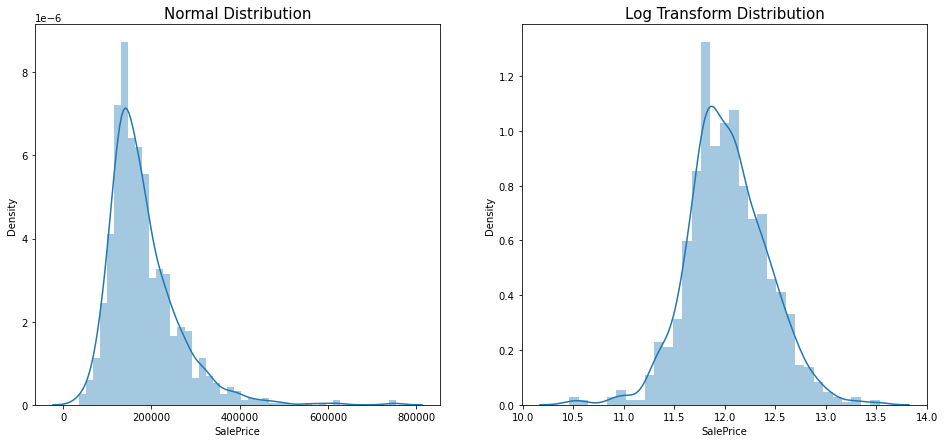

In [61]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.title("Normal Distribution",fontsize=15)
sns.distplot(y)
plt.subplot(1,2,2)
plt.title("Log Transform Distribution",fontsize=15)
sns.distplot(np.log(y))

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X_new,np.log(y),test_size=0.3,random_state=42)

In [63]:
from lightgbm import LGBMRegressor

# Training Multiple Models

In [64]:
models={
    "ExtraTreesRegressor":ExtraTreesRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "LinearRegression":LinearRegression(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "Lasso":Lasso(),
    "LGBMRegressor":LGBMRegressor()
}

In [65]:
models

{'ExtraTreesRegressor': ExtraTreesRegressor(),
 'RandomForestRegressor': RandomForestRegressor(),
 'LinearRegression': LinearRegression(),
 'DecisionTreeRegressor': DecisionTreeRegressor(),
 'Lasso': Lasso(),
 'LGBMRegressor': LGBMRegressor()}

************************************************ ExtraTreesRegressor *****************************************************
MEAN SQUARED ERROR 0.023562613180611022


MEAN ABSOLUTE ERROR 0.10290238809498709


CVS_SCORE 0.8738830210568922


R2_SCORE 0.8563298477011119


RMSE 0.15350118299417442


MODEL PERFORMANCE CURVE


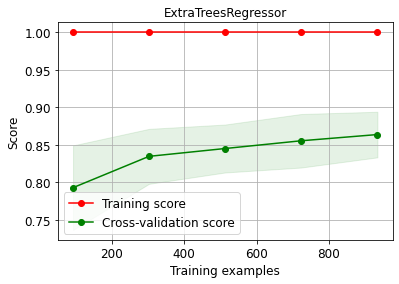

************************************************ RandomForestRegressor *****************************************************
MEAN SQUARED ERROR 0.025907924406699055


MEAN ABSOLUTE ERROR 0.10769516976676384


CVS_SCORE 0.8639125452818467


R2_SCORE 0.8420295993178967


RMSE 0.16095938744509142


MODEL PERFORMANCE CURVE


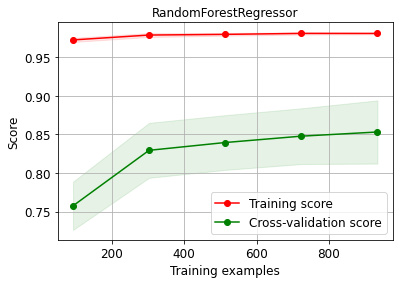

************************************************ LinearRegression *****************************************************
MEAN SQUARED ERROR 0.021243986051789187


MEAN ABSOLUTE ERROR 0.09393983016159797


CVS_SCORE 0.8689041427123518


R2_SCORE 0.8704673930645557


RMSE 0.14575316823928455


MODEL PERFORMANCE CURVE


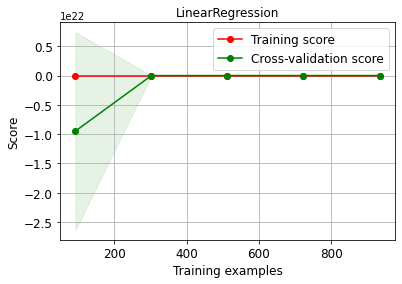

************************************************ DecisionTreeRegressor *****************************************************
MEAN SQUARED ERROR 0.046287630170731016


MEAN ABSOLUTE ERROR 0.15367766147232625


CVS_SCORE 0.639344238494021


R2_SCORE 0.7177668357406239


RMSE 0.21514560225747356


MODEL PERFORMANCE CURVE


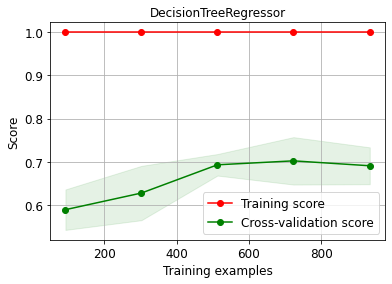

************************************************ Lasso *****************************************************
MEAN SQUARED ERROR 0.16422438702087788


MEAN ABSOLUTE ERROR 0.31972702403325554


CVS_SCORE -0.020786674718036212


R2_SCORE -0.0013381161770285033


RMSE 0.4052460820549384


MODEL PERFORMANCE CURVE


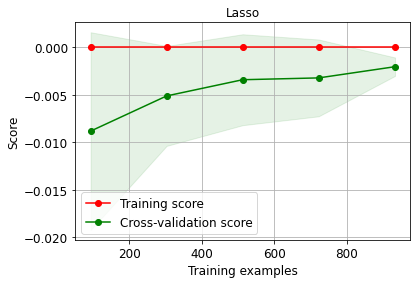

************************************************ LGBMRegressor *****************************************************
MEAN SQUARED ERROR 0.02167330435589827


MEAN ABSOLUTE ERROR 0.0975226515632368


CVS_SCORE 0.8747630822697372


R2_SCORE 0.8678496772083701


RMSE 0.14721855982143783


MODEL PERFORMANCE CURVE


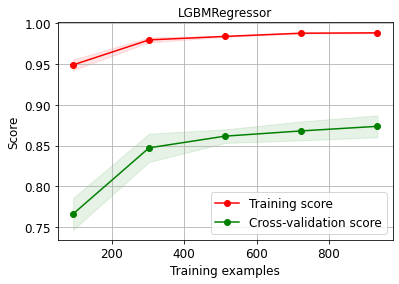

In [66]:
CVS=[]
R2=[]
MSE=[]
MAE=[]
RMSE=[]
NAME=[]
kf=KFold(n_splits=5,shuffle=True)
for name, model in models.items():
  print("************************************************",name,"*****************************************************")
  NAME.append(name)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  mse=mean_squared_error(y_test,y_pred)
  MSE.append(mse)
  print("MEAN SQUARED ERROR",mse)
  mae=mean_absolute_error(y_test,y_pred)
  MAE.append(mae)
  print('\n')
  print("MEAN ABSOLUTE ERROR",mae)
  cvs=cross_val_score(model,X_new,np.log(y),scoring='r2',cv=kf).mean()
  CVS.append(cvs)
  print('\n')
  print("CVS_SCORE",cvs)
  r2=r2_score(y_test,y_pred)
  R2.append(r2)
  print('\n')
  print("R2_SCORE",r2)
  rmse=np.sqrt(mse)
  RMSE.append(rmse)
  print('\n')
  print("RMSE",rmse)
  print('\n')
  print('MODEL PERFORMANCE CURVE')
  skplt.estimators.plot_learning_curve(model,X_new,np.log(y),cv=kf,scoring='r2',title=name,text_fontsize='large')
  plt.show()

In [67]:
models_result=pd.DataFrame({
    "NAME":NAME,
    "Cross_Val_Score":CVS,
    "R2_score":R2,
    "Mean_squared_error":MSE,
    "Mean_Absolute_Error":MAE,
    "RMSE":RMSE
})

In [68]:
models_result

NAME  Cross_Val_Score  R2_score  Mean_squared_error  \
0    ExtraTreesRegressor         0.873883  0.856330            0.023563   
1  RandomForestRegressor         0.863913  0.842030            0.025908   
2       LinearRegression         0.868904  0.870467            0.021244   
3  DecisionTreeRegressor         0.639344  0.717767            0.046288   
4                  Lasso        -0.020787 -0.001338            0.164224   
5          LGBMRegressor         0.874763  0.867850            0.021673   

   Mean_Absolute_Error      RMSE  
0             0.102902  0.153501  
1             0.107695  0.160959  
2             0.093940  0.145753  
3             0.153678  0.215146  
4             0.319727  0.405246  
5             0.097523  0.147219

There are some models like linearregression and lasso they are showing a good result but when we see there learning curve we can see these are underfitted so i am choosing lightgbm as my best model because it is performing good and also have a good learning curve

In [69]:
lgb=LGBMRegressor()

# Hyperparameter Tuning

In [70]:
param={
    'boosting_type': ['gbdt','dart'],
    'n_estimators':[100,200,500,600],
    'importance_type': ['mse','mae'],
    'max_depth': [-1,1,2,3,4,5]
}

In [71]:
GRID=GridSearchCV(estimator=lgb,scoring='r2',param_grid=param,n_jobs=-1,cv=kf)

In [72]:
GRID.fit(X_new,np.log(y))

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'importance_type': ['mse', 'mae'],
                         'max_depth': [-1, 1, 2, 3, 4, 5],
                         'n_estimators': [100, 200, 500, 600]},
             scoring='r2')

In [73]:
GRID.best_score_

0.8849883277091445

In [74]:
GRID.best_params_

{'boosting_type': 'gbdt',
 'importance_type': 'mse',
 'max_depth': 3,
 'n_estimators': 500}

In [75]:
light=LGBMRegressor(boosting_type= 'gbdt',
 importance_type= 'mse',
 max_depth= 3,
 n_estimators= 200)

# Final Model Learning Curve

MODEL PERFORMANCE CURVE


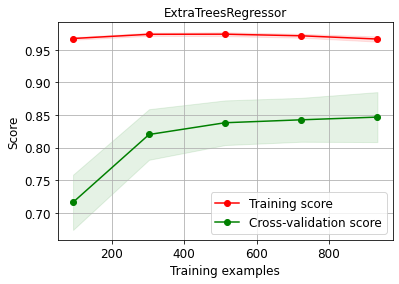

In [76]:
print('MODEL PERFORMANCE CURVE')
skplt.estimators.plot_learning_curve(light,X_new,y,cv=kf,scoring='r2',title='ExtraTreesRegressor',text_fontsize='large')
plt.show()

In [77]:
light.fit(X_train,y_train)
y_predicted=light.predict(X_test)

# FINAL MODEL PERFORMANCE METRICS

In [78]:
print("Mean Squared Error",mean_squared_error(y_test,y_predicted))
print("Mean Absolute Error",mean_absolute_error(y_test,y_predicted))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_predicted)))
print("R2 Score",r2_score(y_test,y_predicted))

Mean Squared Error 0.020248865027089318
Mean Absolute Error 0.09469047324610229
RMSE 0.14229850676338568
R2 Score 0.8765350218151775


### SAVING THE MODEL

In [79]:
import joblib
joblib.dump(GRID,"House-price-model.obj")

['House-price-model.obj']

In [95]:
model=joblib.load('House-price-model.obj')

In [101]:
test=pd.read_csv('test.csv')

In [102]:
Test=pipe.fit_transform(test)

In [106]:
Test_price=pd.DataFrame(Test,columns=['SalePrice'])

In [108]:
TEST=pd.read_csv('test.csv')
TEST['SalePrice']=np.exp(Test_price)

In [109]:
TEST

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
0           HLS    AllPub  ...        0    NaN   NaN         NaN       0   
1           Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
2           Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
3           Bnk    AllPub  ...        0    NaN   NaN         NaN       0   
4           Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
..          ...       ...  ...      ...    ...   ...         ...     ...   
287         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
288         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
289         Lvl    AllPub  ...        0    NaN   NaN        Shed     700   
290         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
291         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
0        7   2007        WD         Normal        NaN  
1        8   2009       COD        Abnorml        NaN  
2        6   2009        WD         Normal        NaN  
3        7   2009        WD         Normal        NaN  
4        1   2008        WD         Normal        NaN  
..     ...    ...       ...            ...        ...  
287     10   2008        WD         Normal        NaN  
288      2   2008        WD         Normal        NaN  
289      3   2010        WD         Normal        NaN  
290     10   2006        WD         Normal        NaN  
291      6   2006        WD         Normal        NaN  

[292 rows x 81 columns]

Now here I have created a predicted column in test file so we can see the prices of home in test file

# THANKYOU